## Zadanie 1: Algorytm 1+1

In [190]:
import numpy as np
import matplotlib.pyplot as plt

In [191]:
rozrzut = 10
wsp_przyrostu = 1.1
l_iteracji = 100
zakres_zmiennosci = [0, 100]

In [192]:
def funkcja_przystosowania(x):
    return np.sin(x / 10.0) * np.sin(x / 200.0)

In [193]:
x_func = np.linspace(zakres_zmiennosci[0], zakres_zmiennosci[1])
y_func = funkcja_przystosowania(x_func)

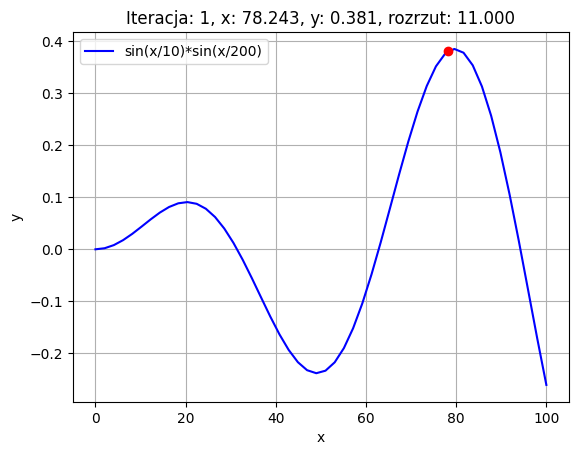

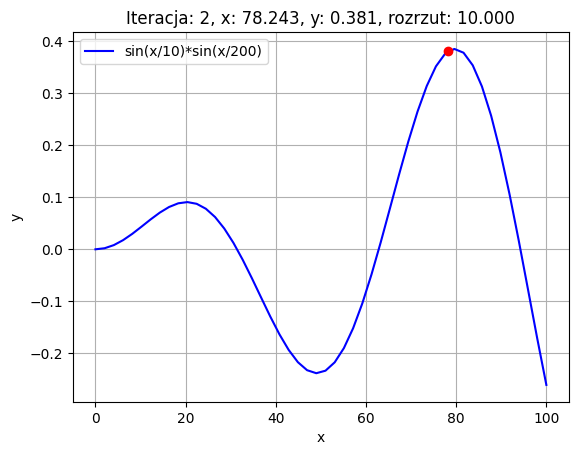

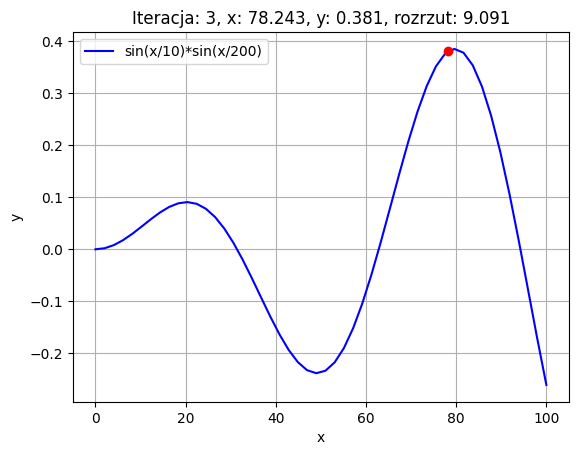

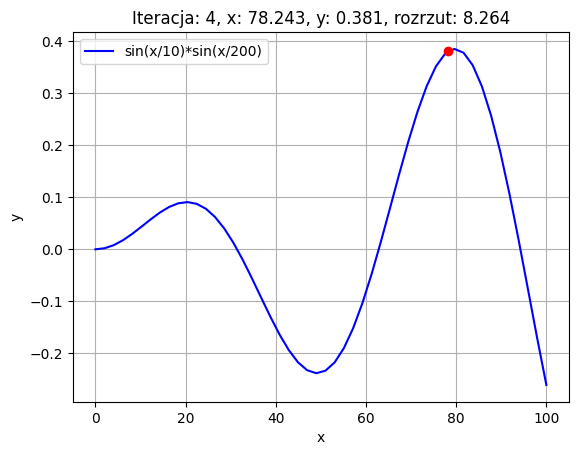

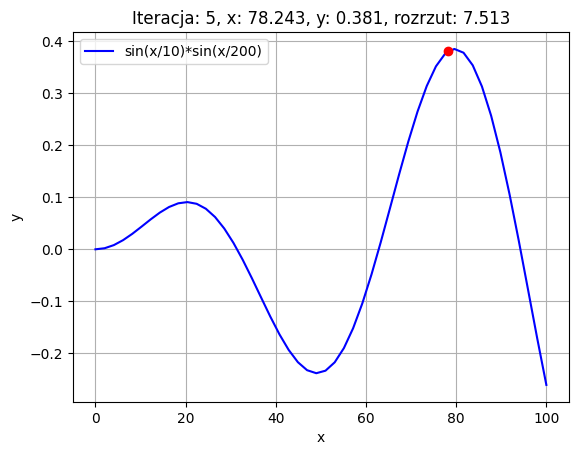

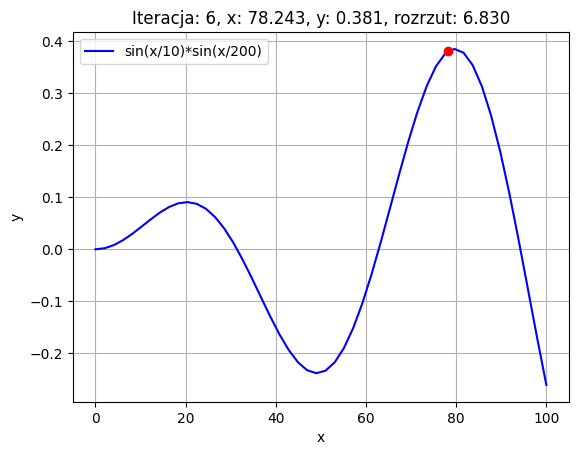

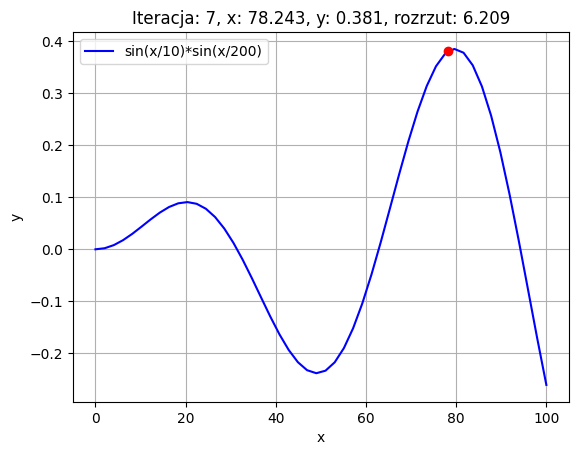

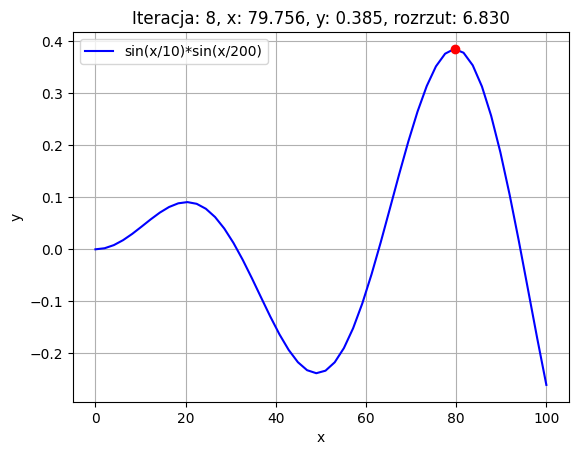

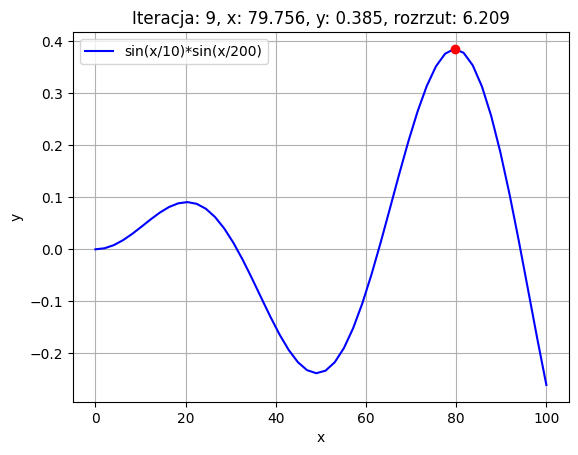

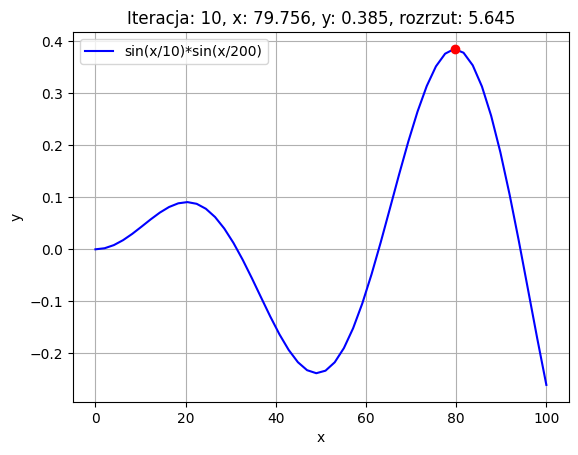

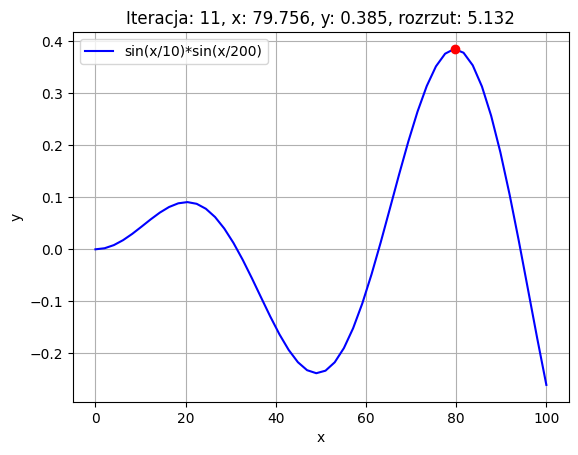

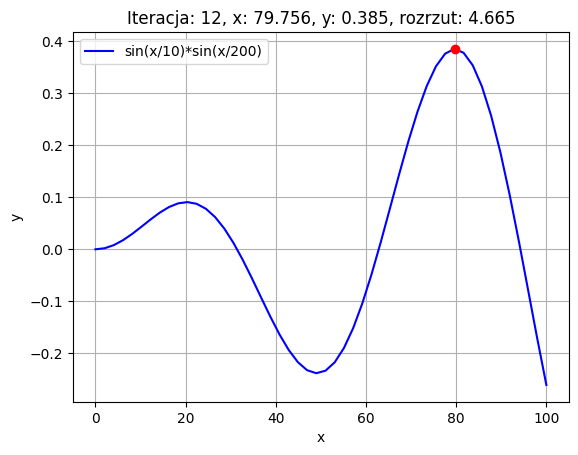

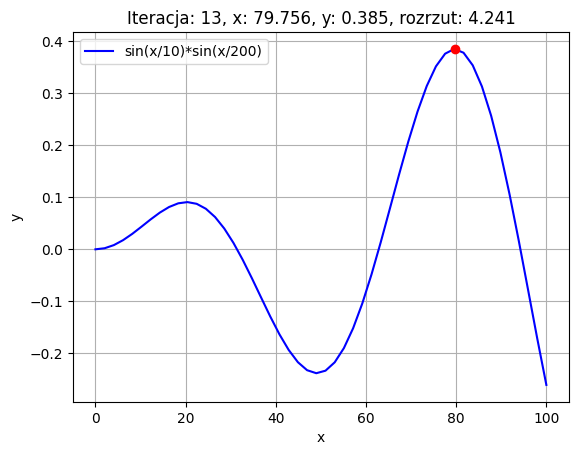

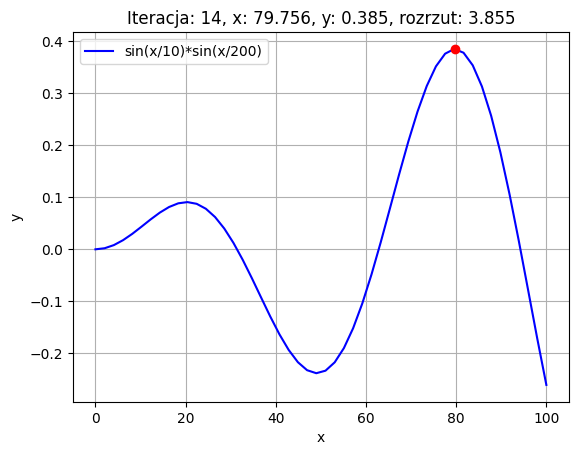

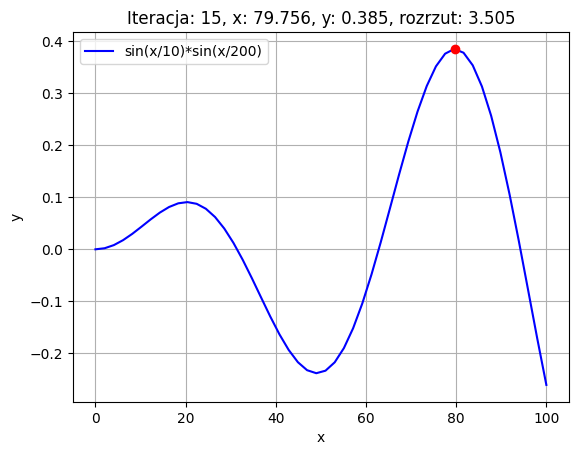

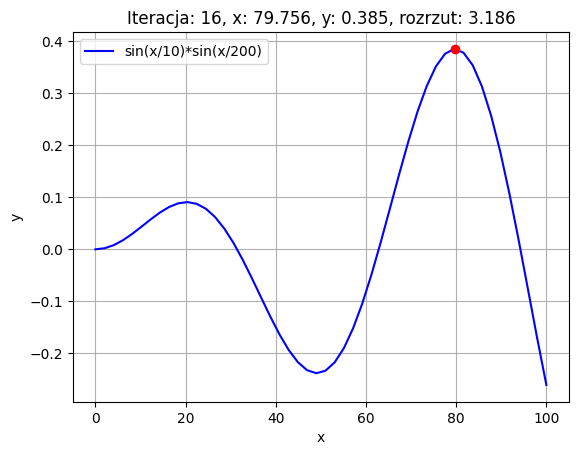

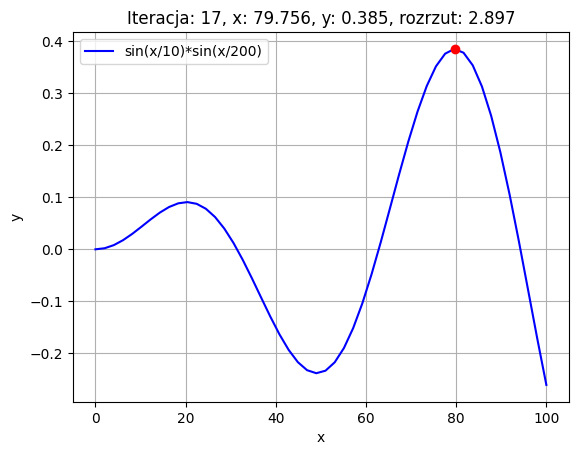

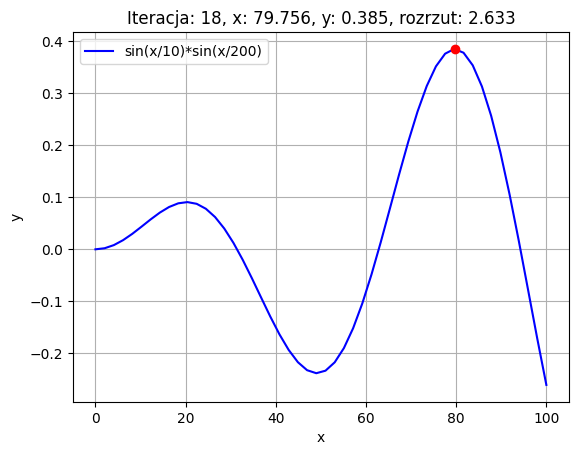

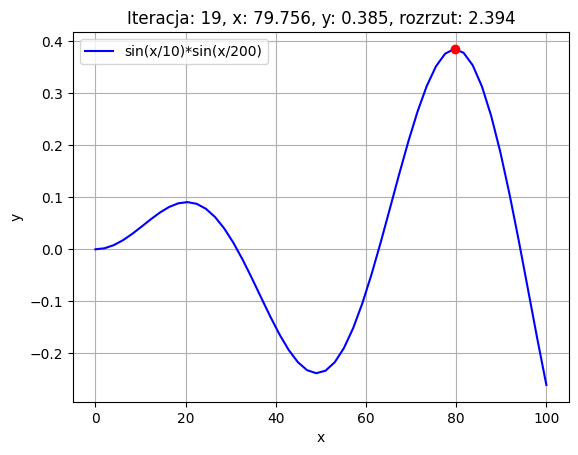

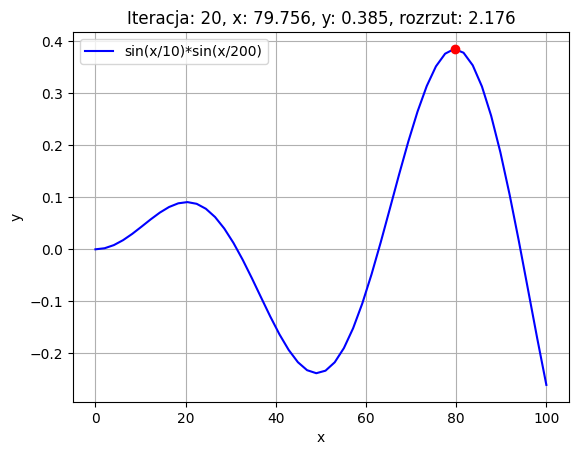

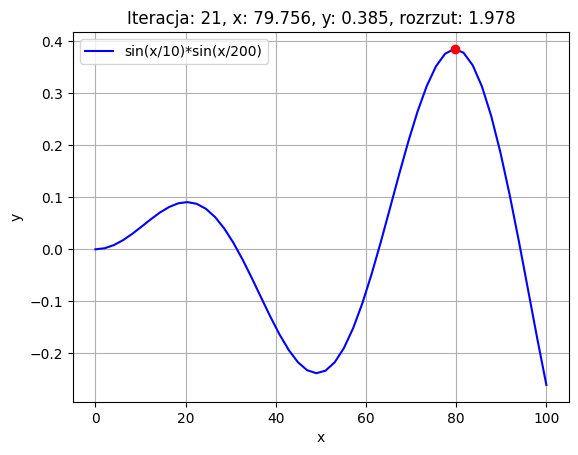

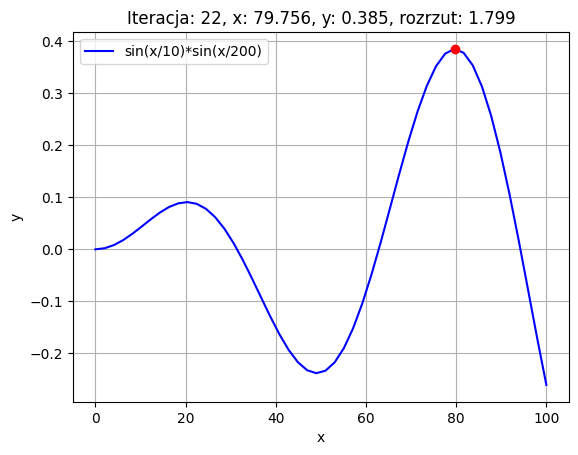

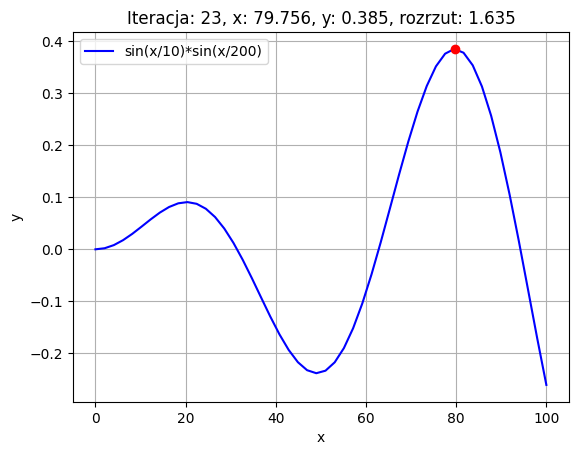

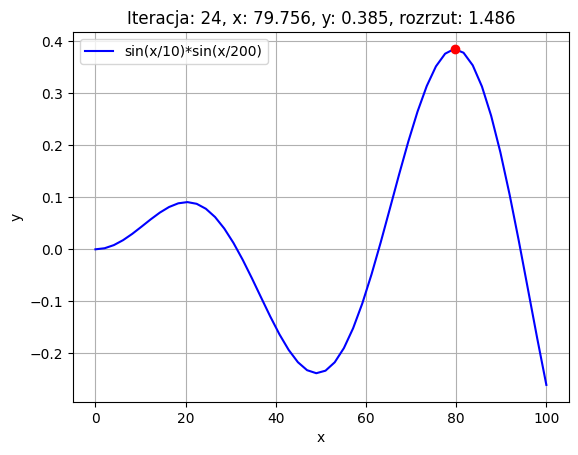

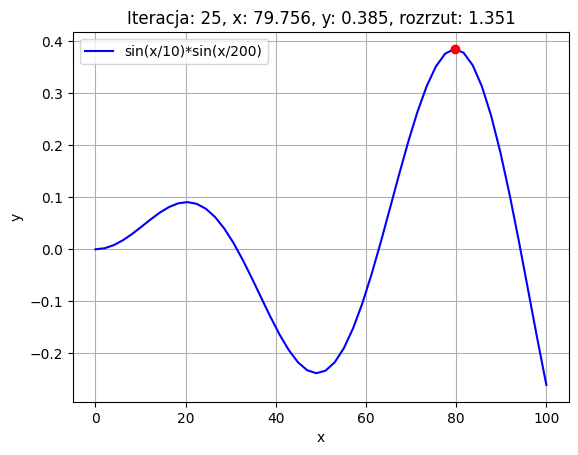

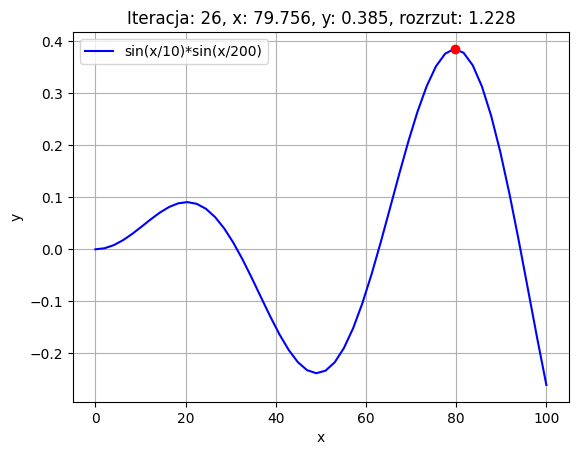

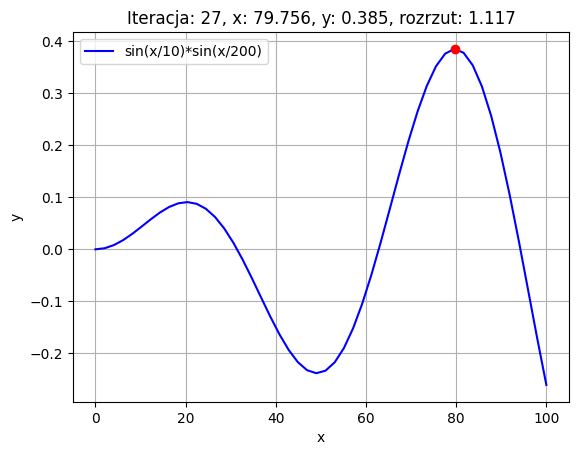

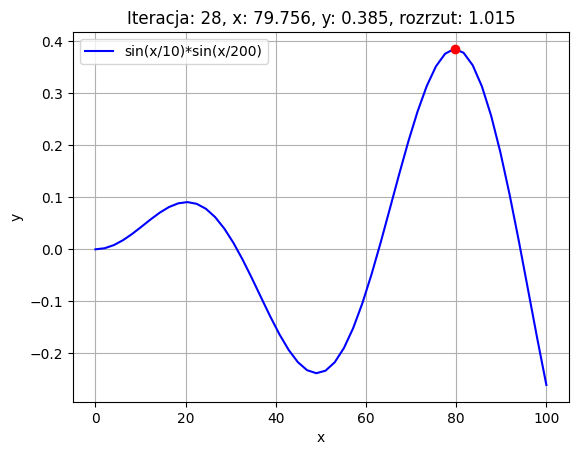

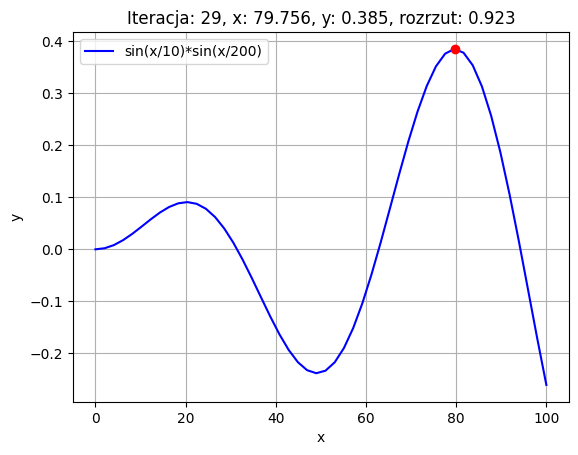

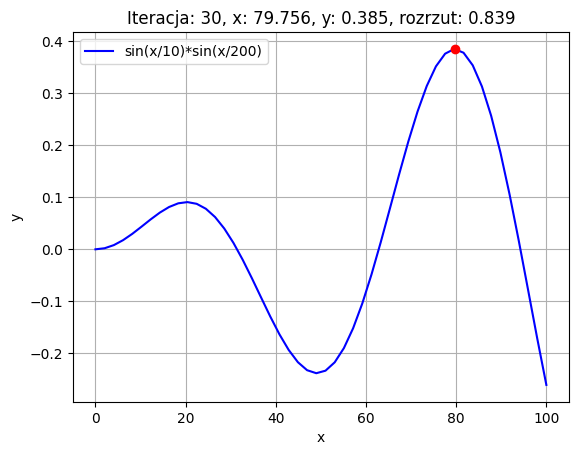

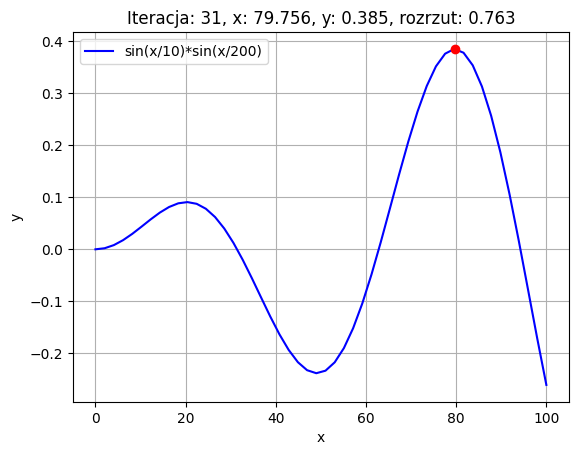

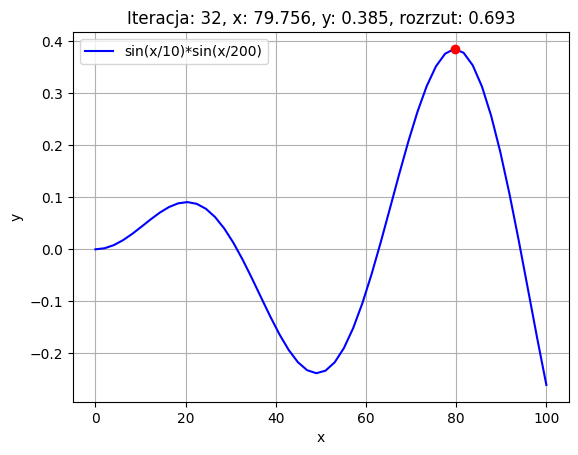

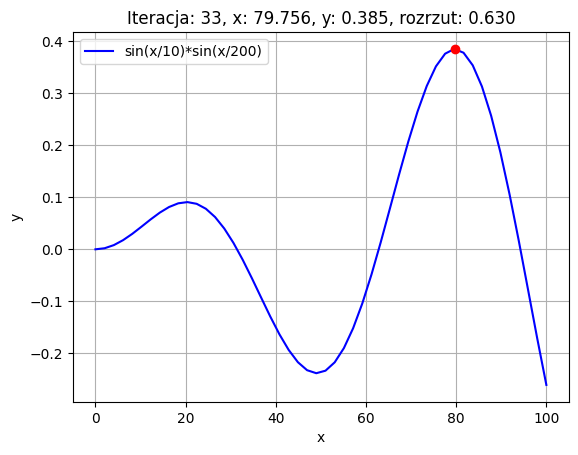

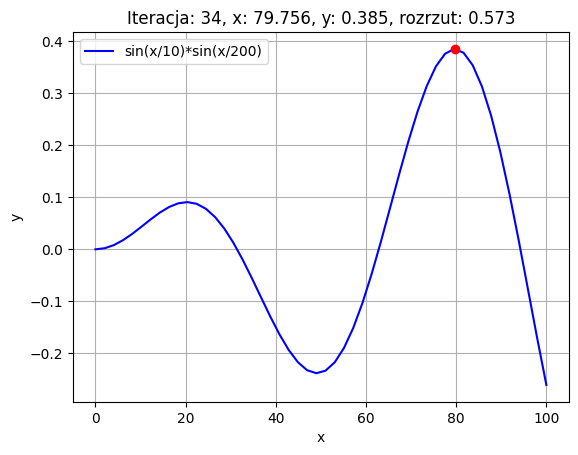

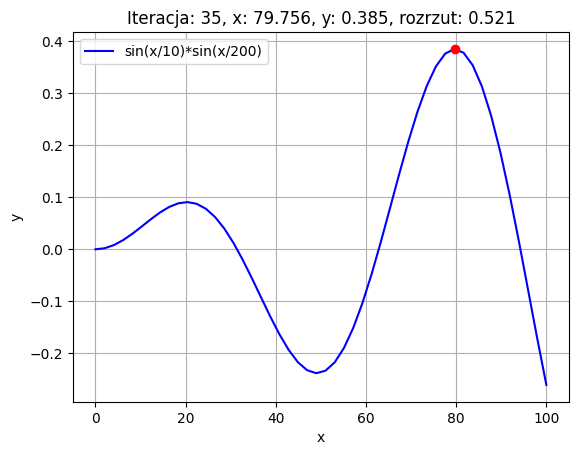

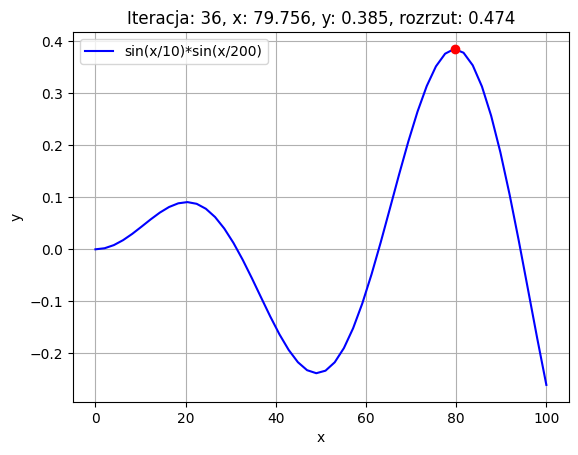

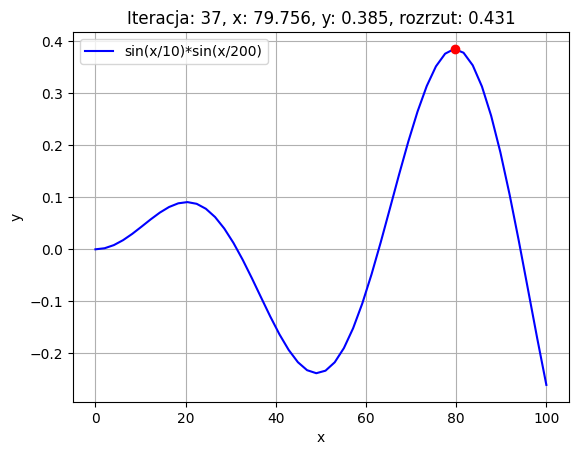

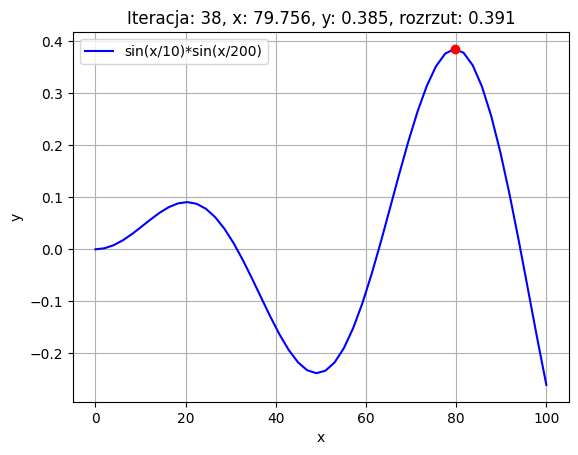

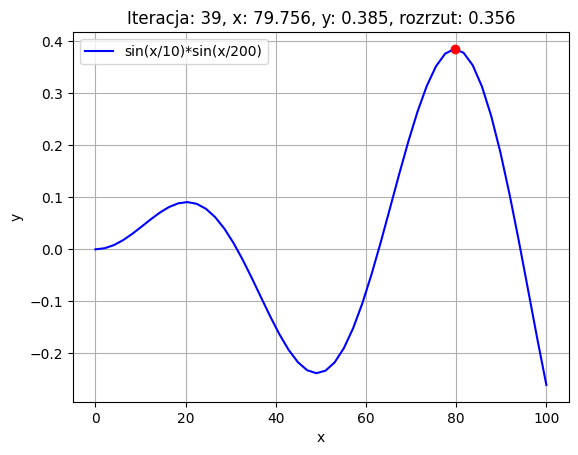

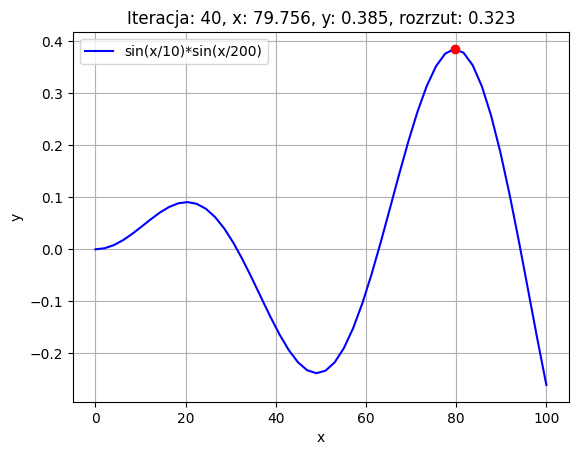

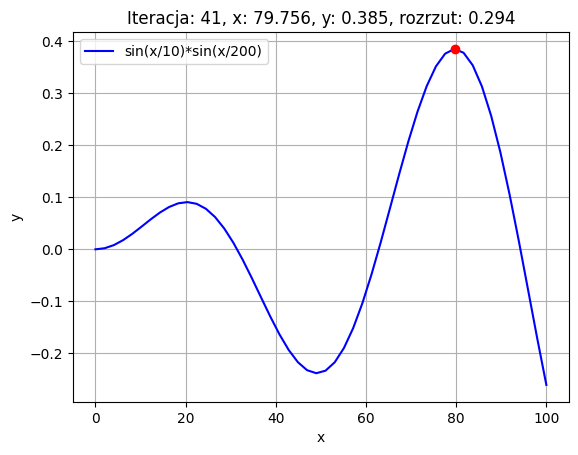

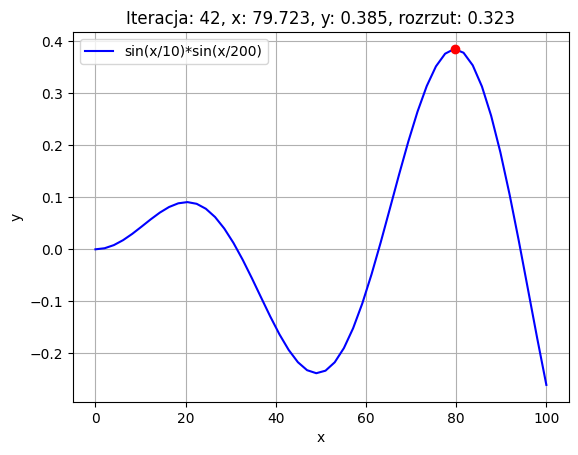

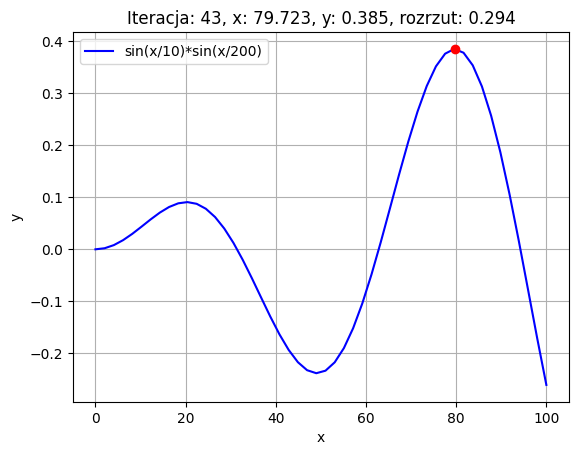

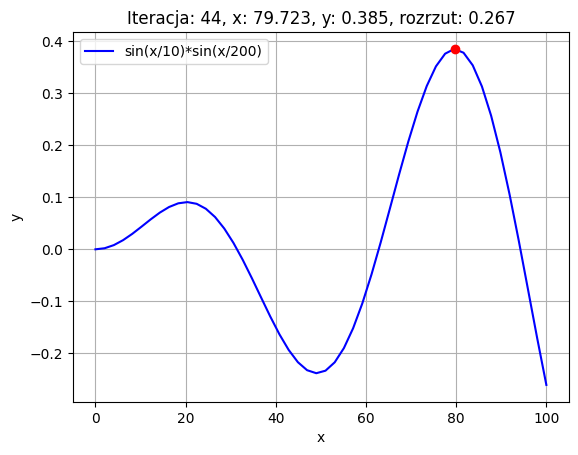

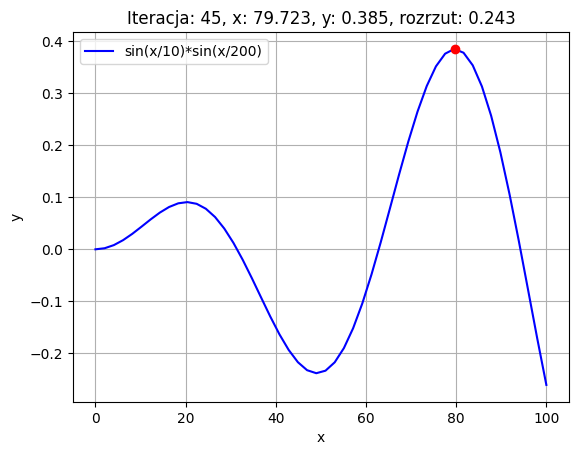

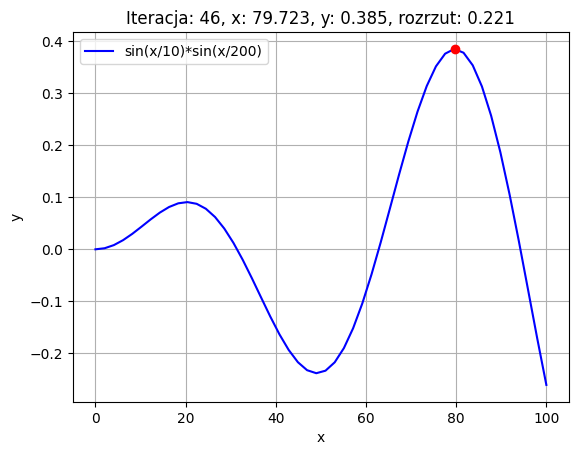

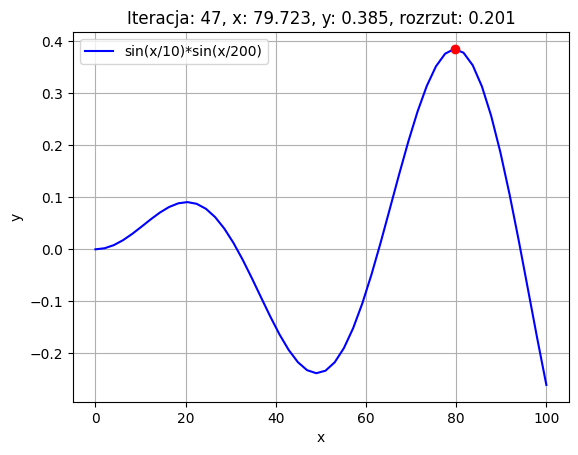

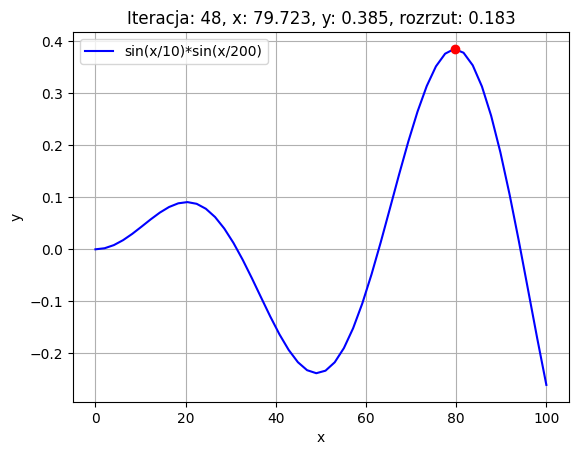

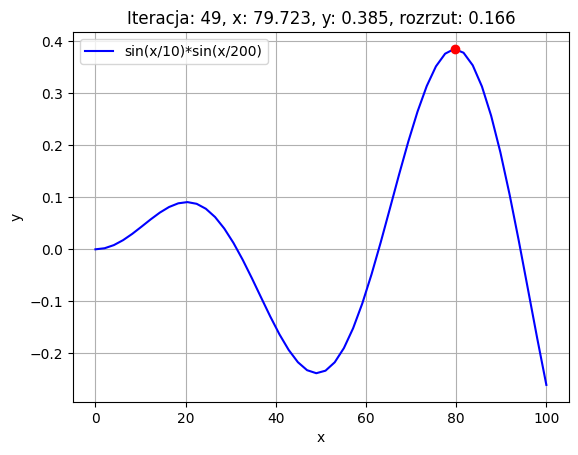

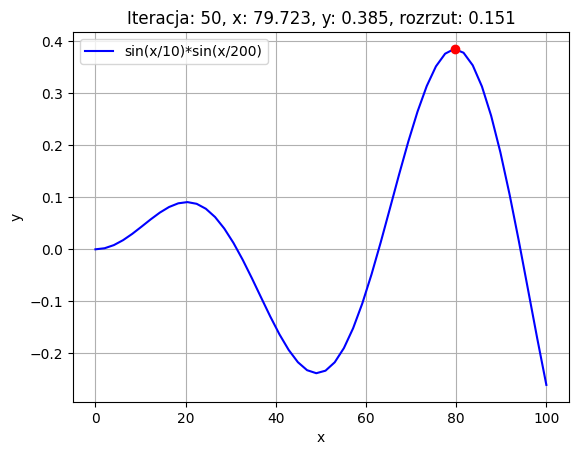

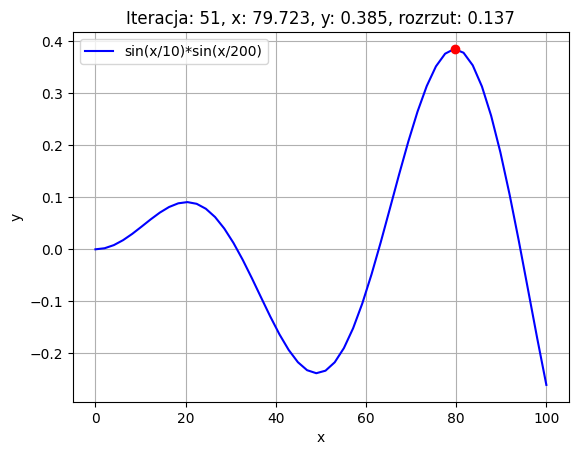

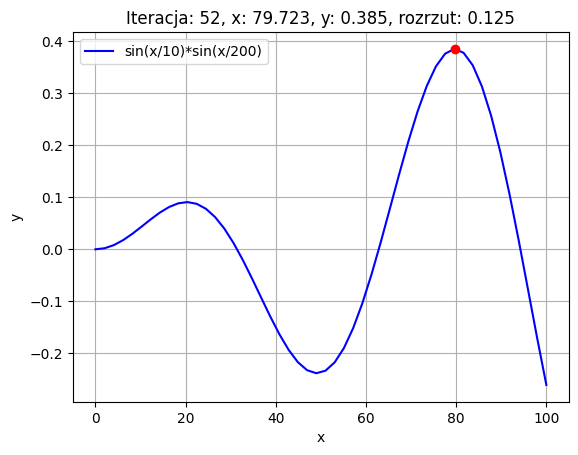

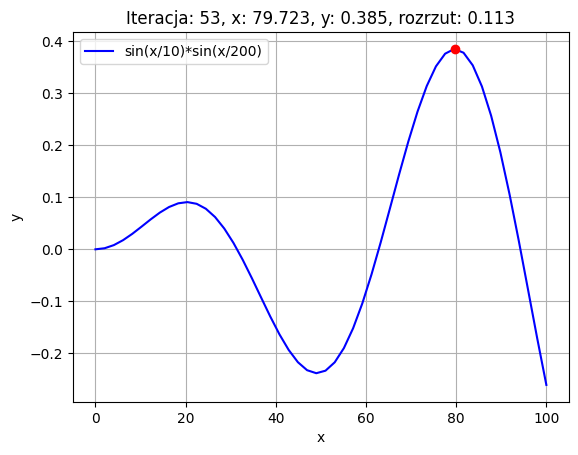

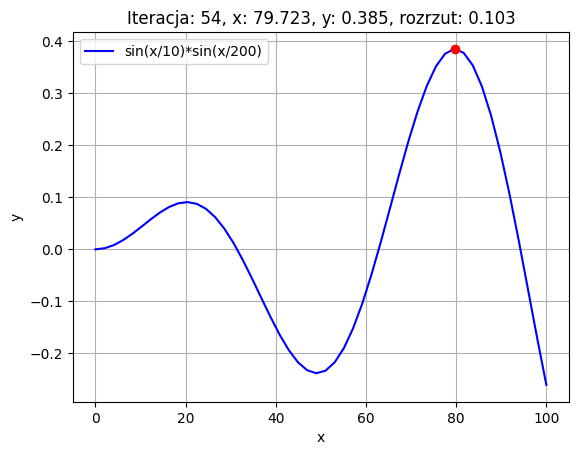

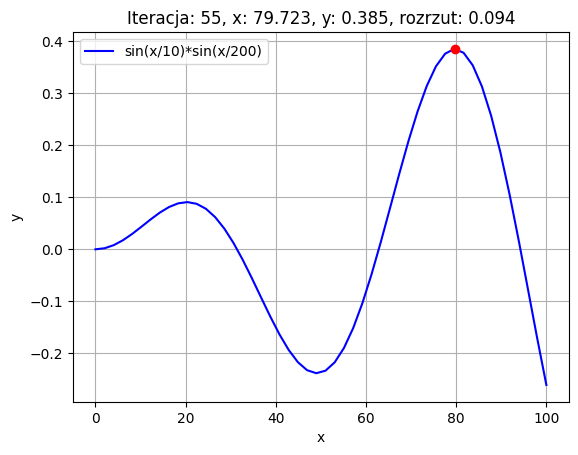

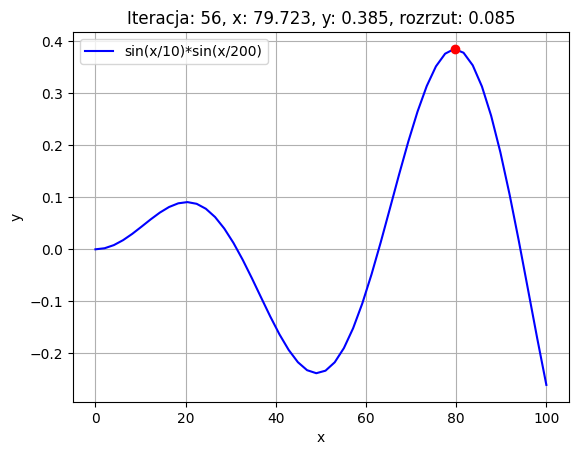

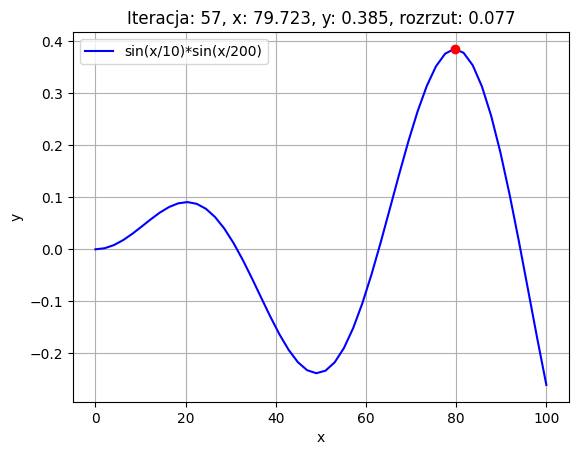

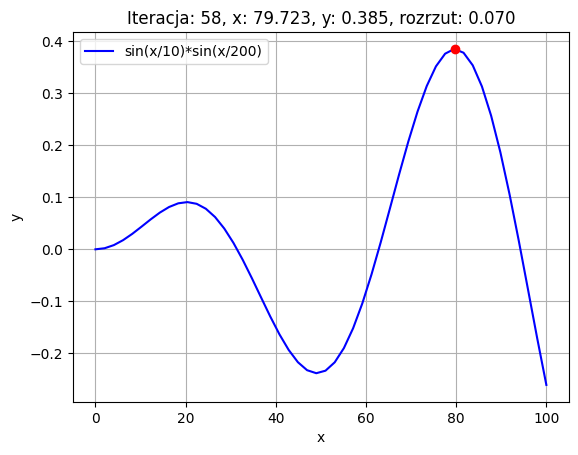

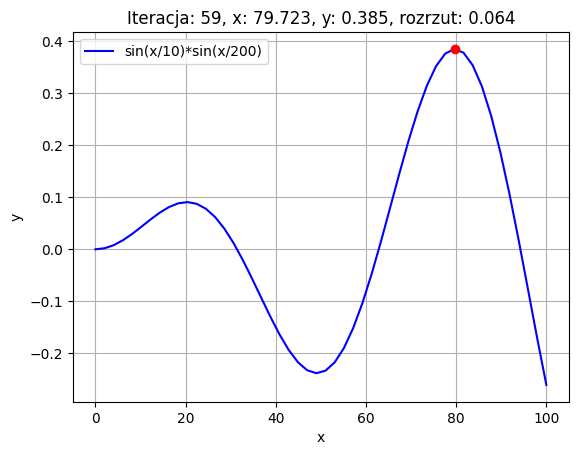

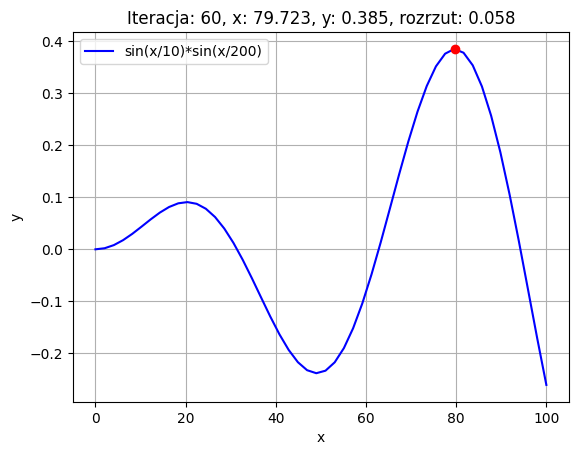

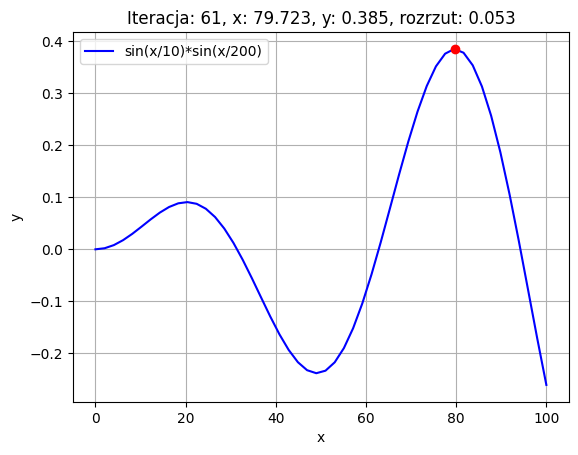

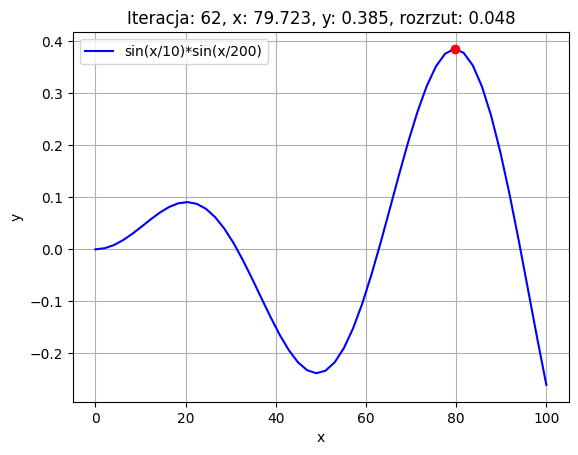

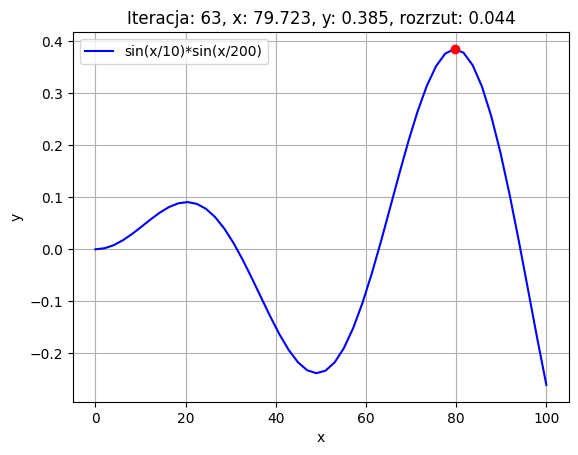

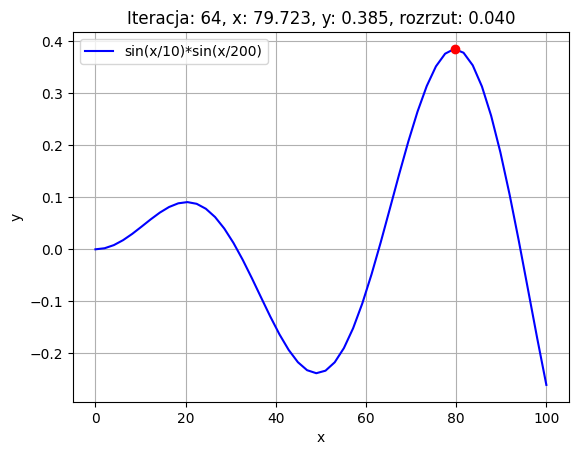

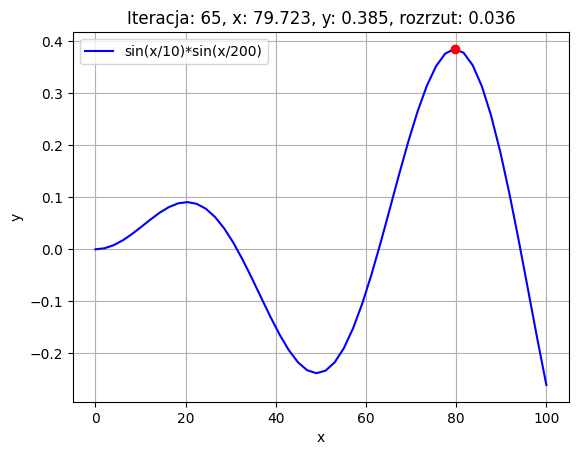

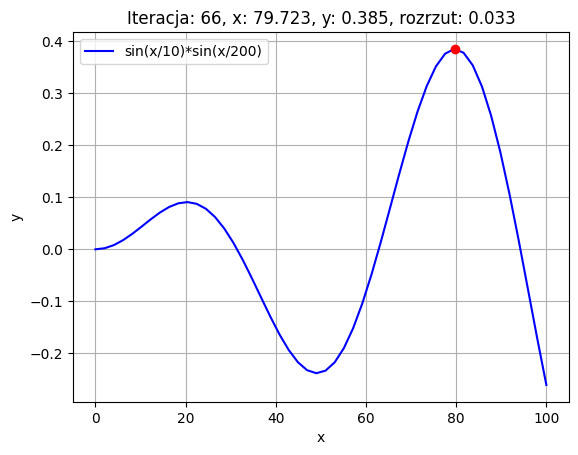

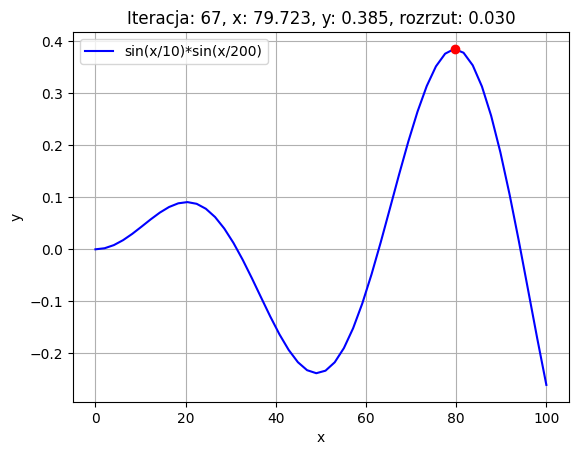

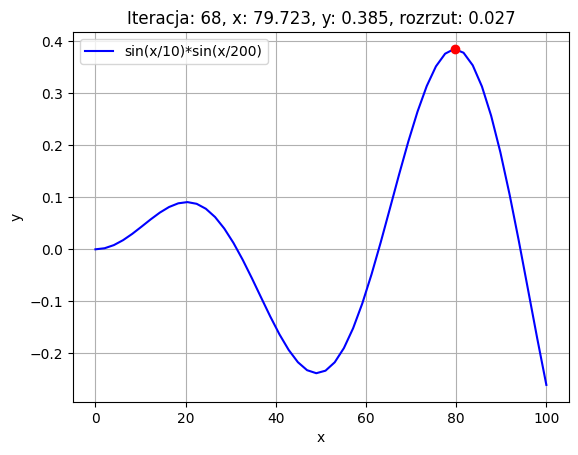

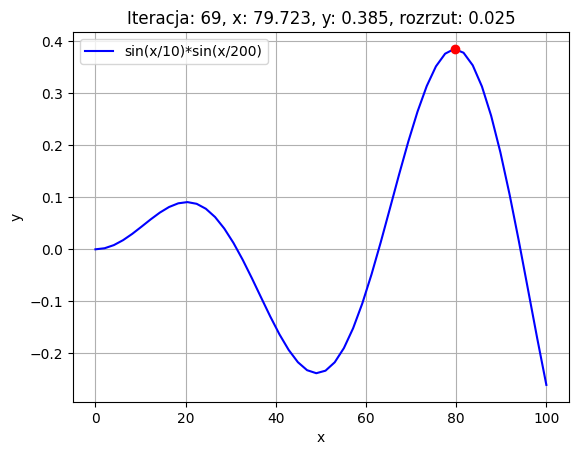

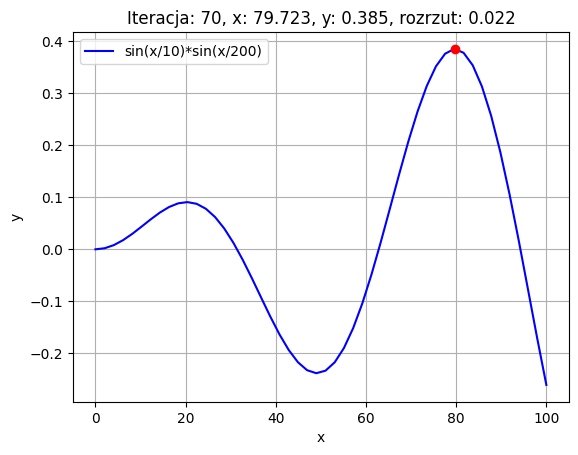

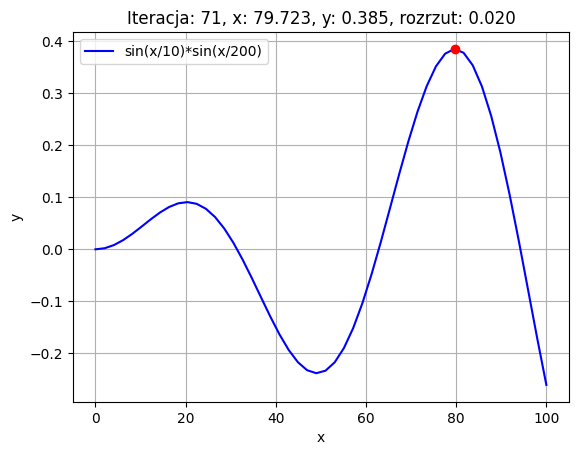

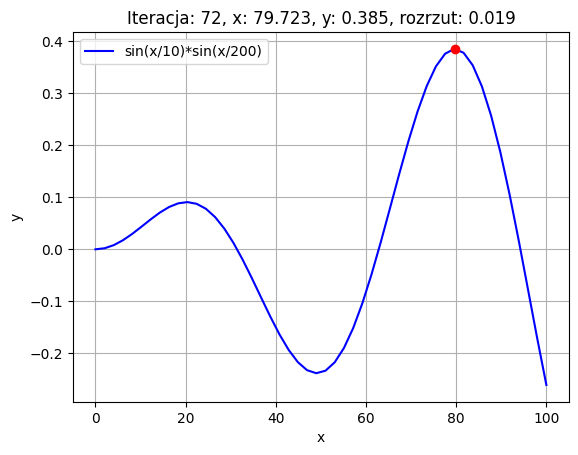

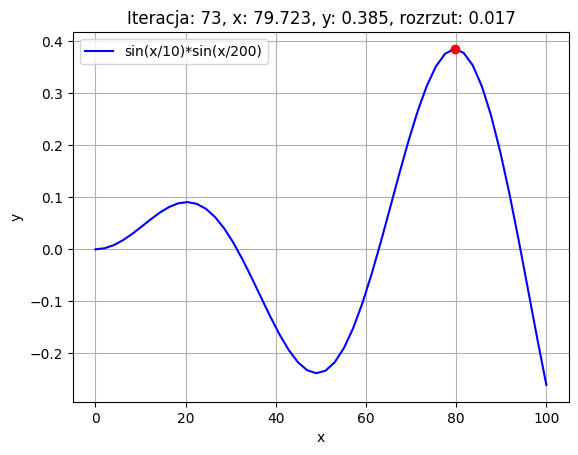

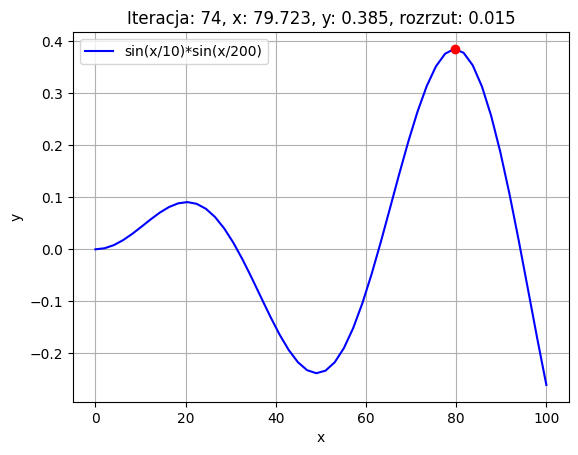

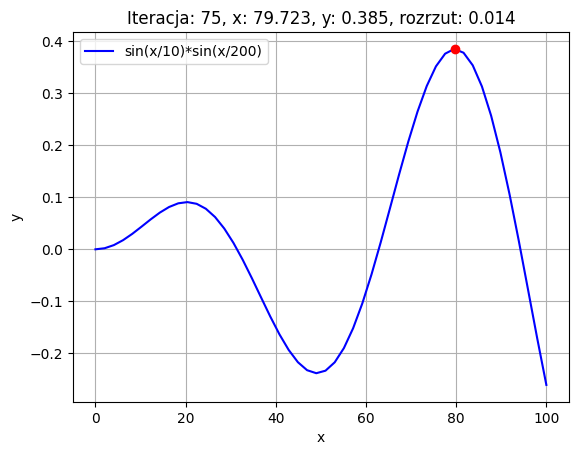

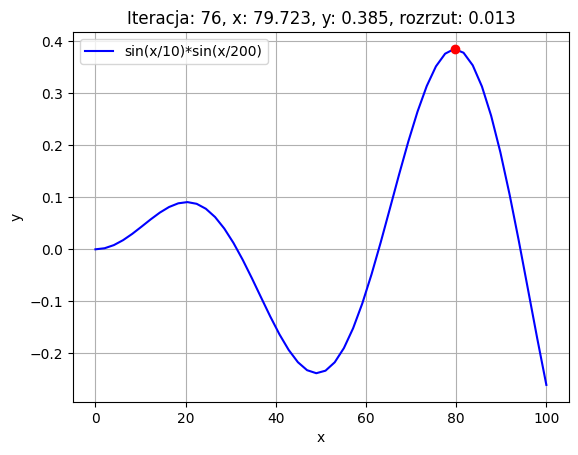

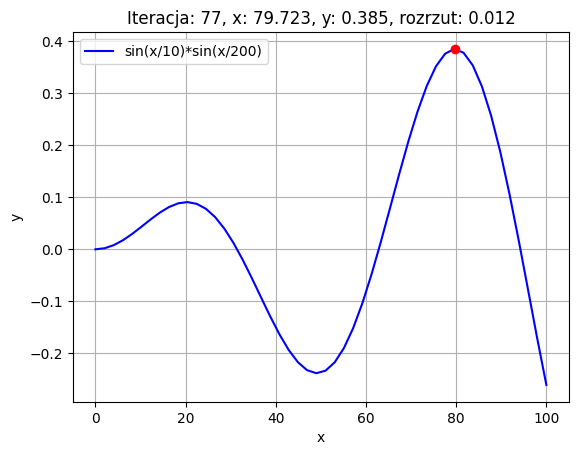

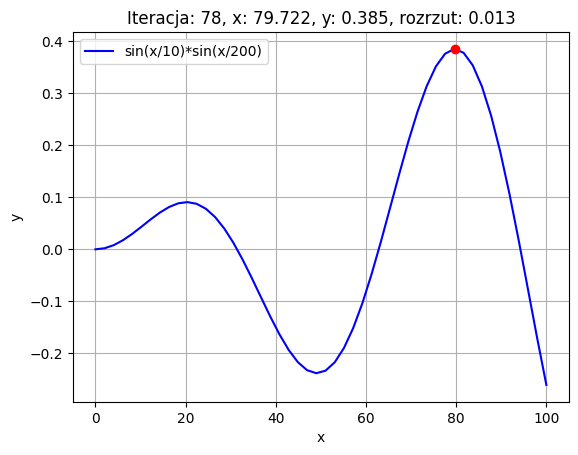

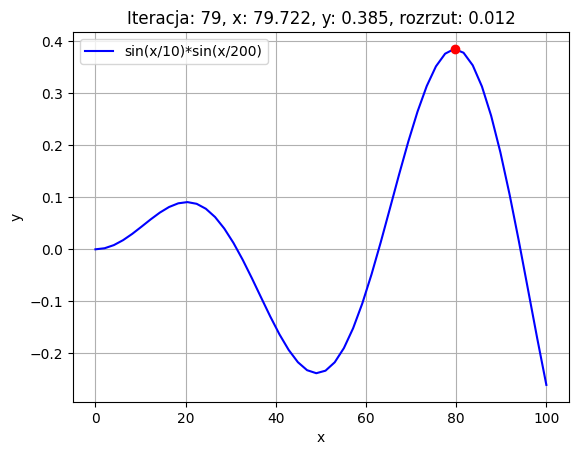

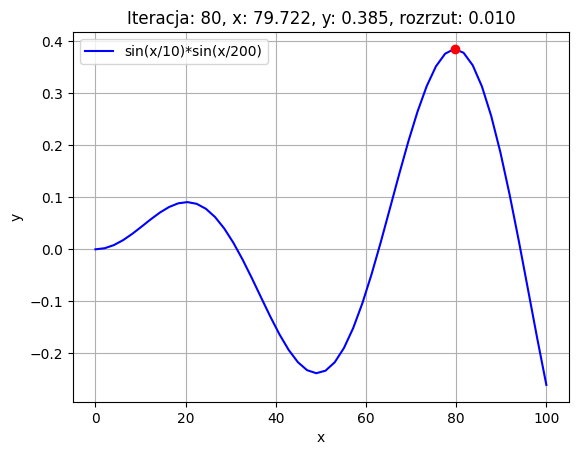

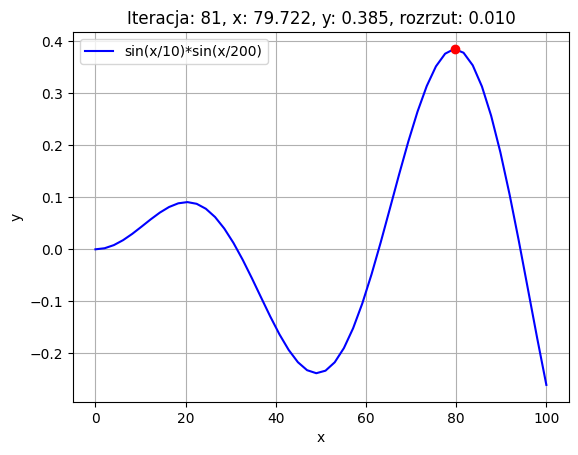

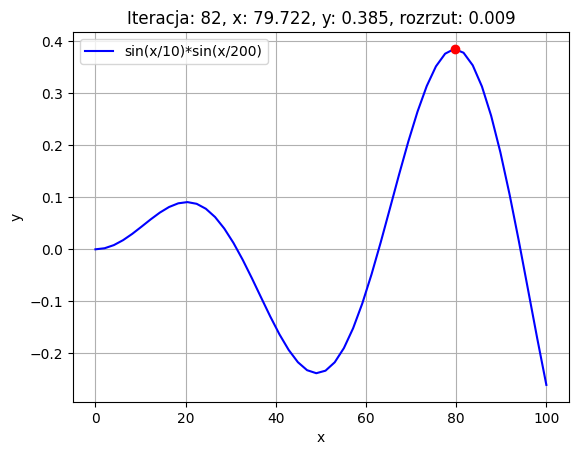

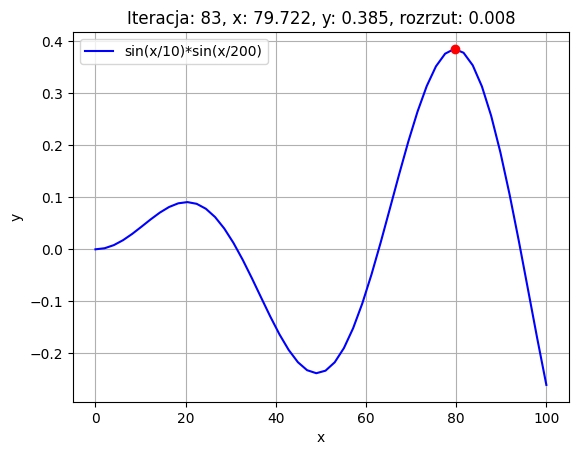

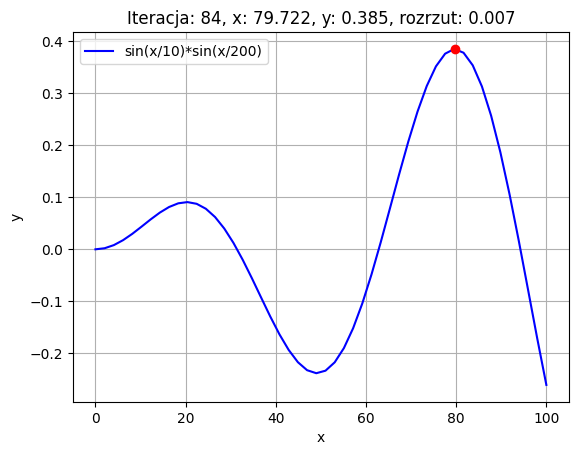

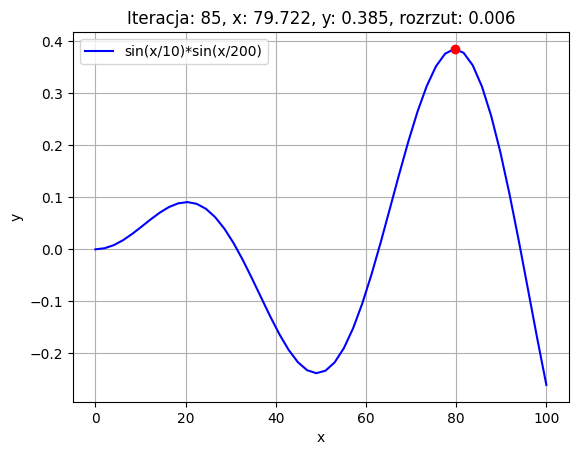

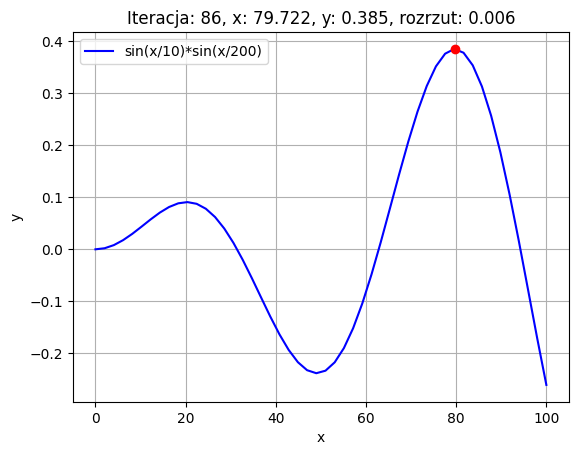

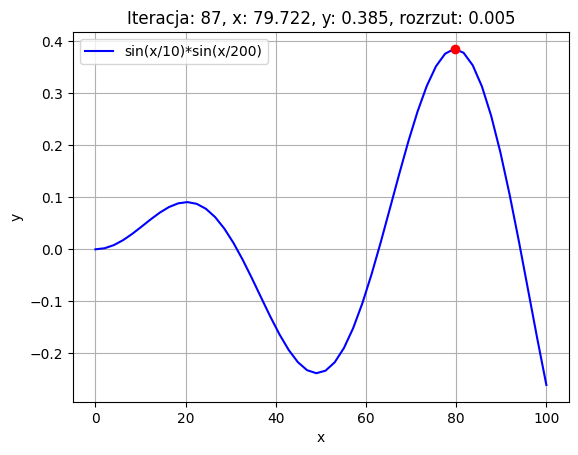

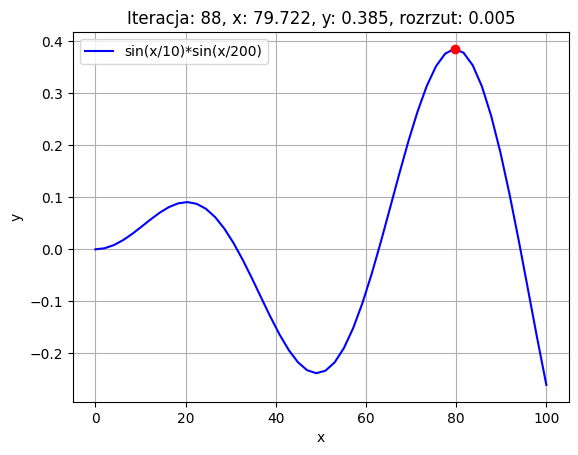

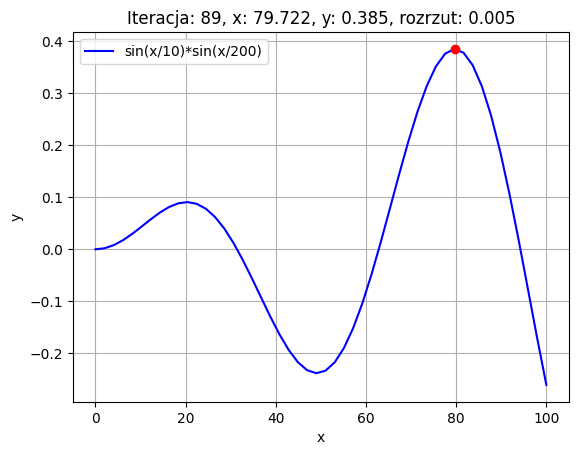

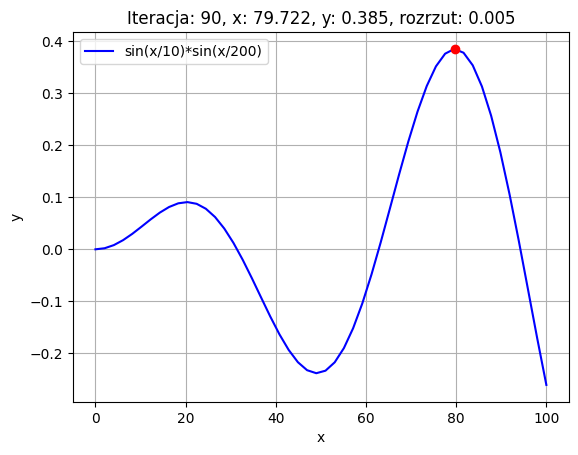

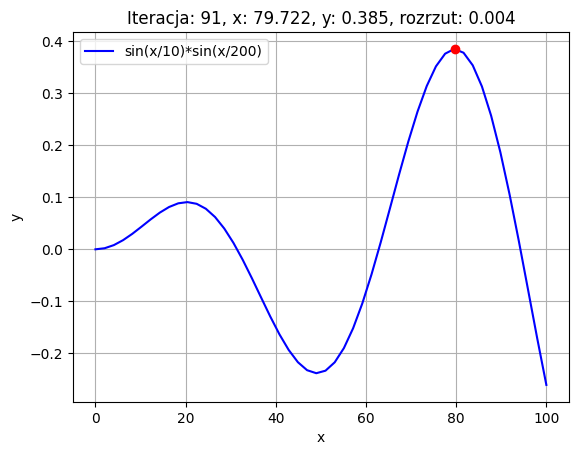

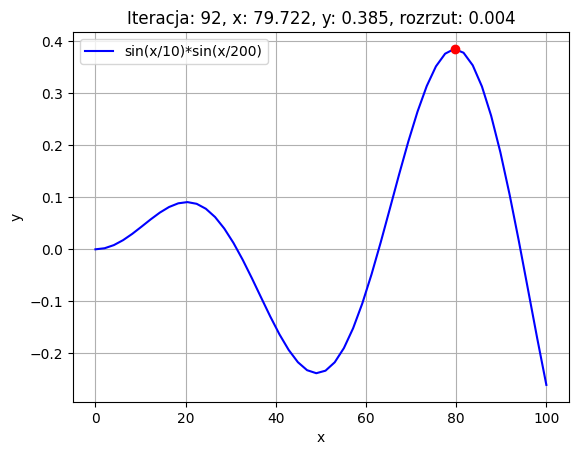

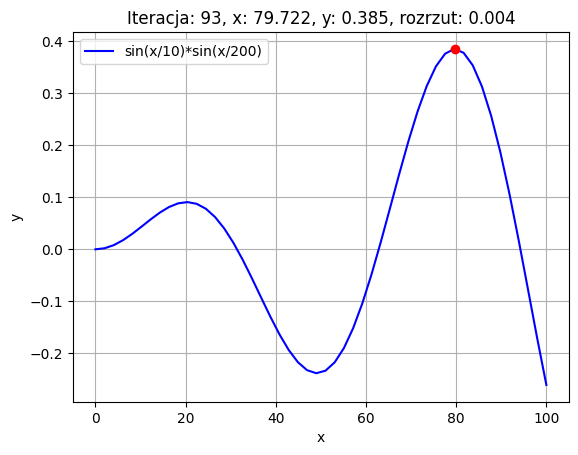

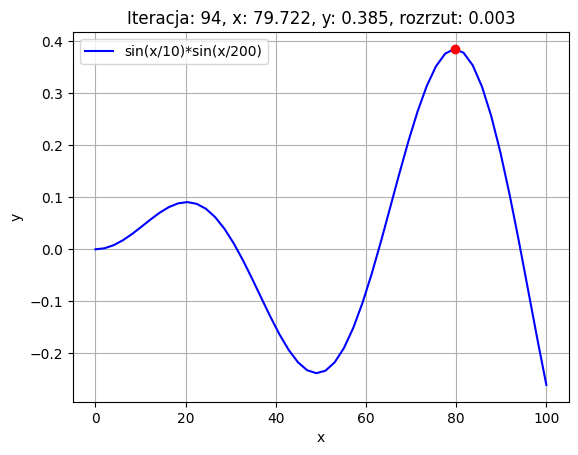

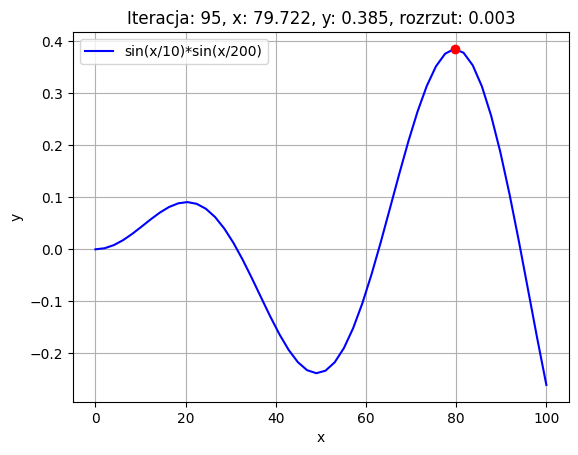

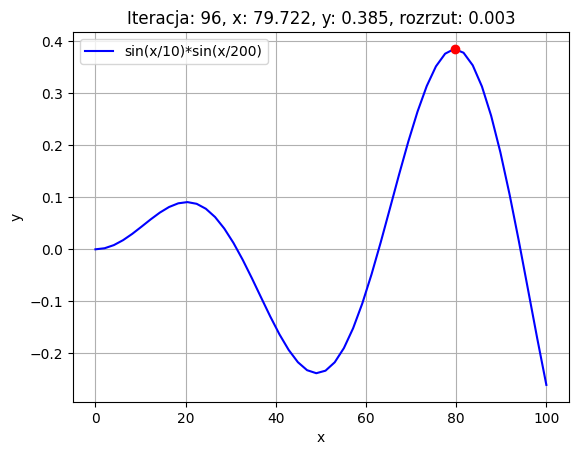

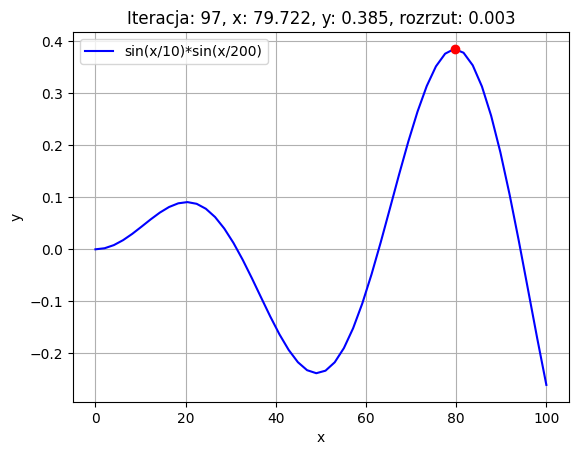

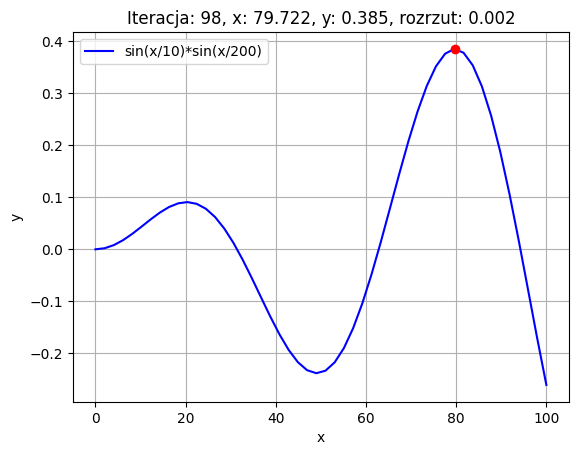

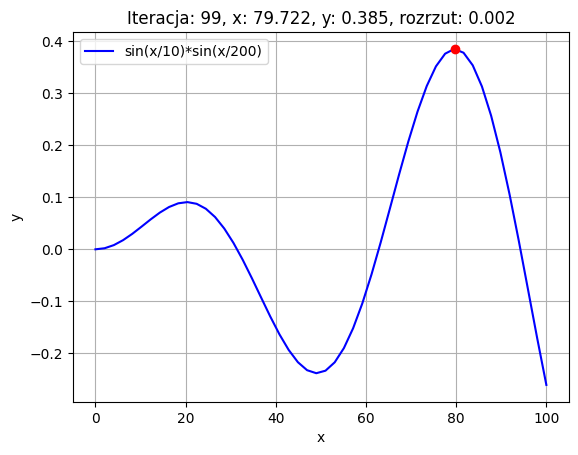

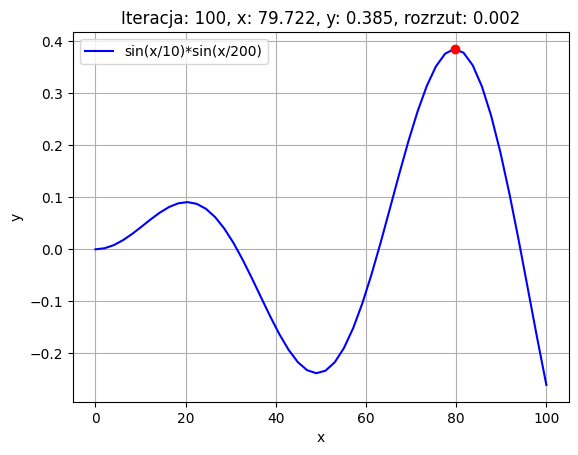

In [194]:
x = np.random.uniform(zakres_zmiennosci[0], zakres_zmiennosci[1])  # 1.	x = początkowa wartość losowo wybrana z przedziału zakres_zmienności
y = funkcja_przystosowania(x)  # 2. y = wartość funkcji przystosowania (tutaj sin(x/10.0).*sin(x./200))

for i in range(l_iteracji):  # 3. wykonaj pętlę l_iteracji razy
    x_pot = x + np.random.uniform(-rozrzut, rozrzut)  # 3.1. xpot = x + zmienna losowa z przedziału [-rozrzut; +rozrzut]
    if x_pot < zakres_zmiennosci[0]:  # 3.2. jeśli wartość parametru xpot przekroczyła dozwolony przedział (zakres_zmienności) należy go skorygować wybraną przez siebie metodą
        x_pot = zakres_zmiennosci[0]
    elif x_pot > zakres_zmiennosci[1]:
        x_pot = zakres_zmiennosci[1]
    
    y_pot = funkcja_przystosowania(x_pot)  # 3.3. ypot = funkcja przystosowania dla xpot
    if y_pot >= y:  # 3.4. jeśli uzyskano nie gorszy wynik (ypot >= y)
        x = x_pot  # 3.4.1. zastąp stare wartości nowymi (x = xpot; y = ypot)
        y = y_pot
        rozrzut *= wsp_przyrostu  # 3.4.2. zwiększ rozrzut o wsp_przyrostu (rozrzut *= wsp_przyrostu)
    else:  # 3.5. jeśli uzyskano gorszy wynik (ypot < y)
        rozrzut /= wsp_przyrostu  # 3.5.1. zmniejsz rozrzut o wsp_przyrostu (rozrzut /= wsp_przyrostu)
    
    plt.plot(x_func, y_func, color='blue', label='sin(x/10)*sin(x/200)')
    plt.scatter(x, y, color='red', zorder=2)
    plt.title(f'Iteracja: {i+1}, x: {x:.3f}, y: {y:.3f}, rozrzut: {rozrzut:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

## Zadanie 2: Strategia ewolucyjna µ+λ

In [195]:
import random

In [196]:
mu = 4
lambda_ = 10
TURNIEJ_ROZMIAR = 2
MUTACJA_POZIOM = 10
ITERACJE_LICZBA = 20

In [197]:
def funkcja_przystosowania(x1, x2):
    return np.sin(x1 * 0.05) + np.sin(x2 * 0.05) + 0.4 * np.sin(x1 * 0.15) + np.sin(x2 * 0.15)

In [198]:
def algorytm_turniejowy(population, population_ratings):
    oss_turniej = np.random.choice(len(population), TURNIEJ_ROZMIAR, replace=False)  # 2.3.1.1. Utwórz zbiór osobników oss_turniej przez losowy wybór turniej_rozmiar osobników z puli rodzicielskiej.
    oss_n = oss_turniej[np.argmax([population_ratings[idx] for idx in oss_turniej])]  # 2.3.1.2. Niech os_n będzie najlepszym osobnikiem ze zbioru oss_turniej biorąc pod uwagę funkcję przystosowania F(). W razie remisu należ wybrać któryś z najlepszych osobników w oss_turniej.
    return population[oss_n]

In [199]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)
Z = funkcja_przystosowania(X, Y)

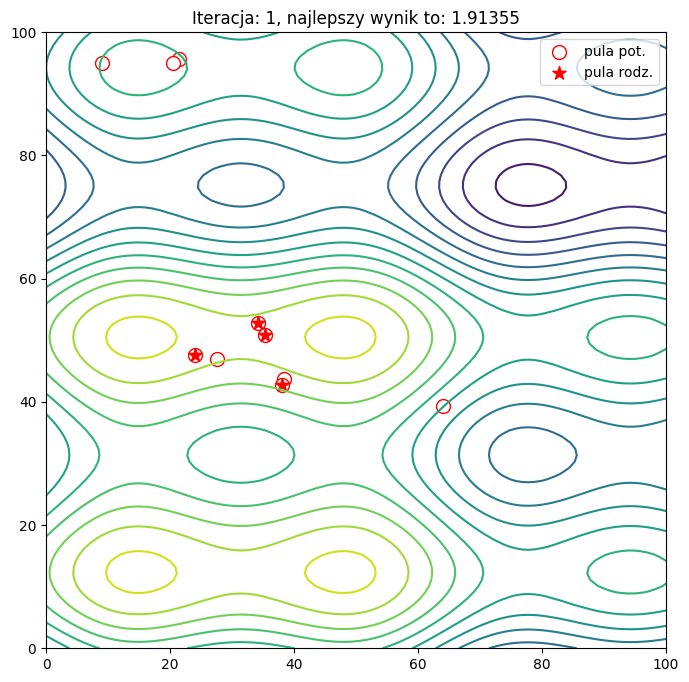

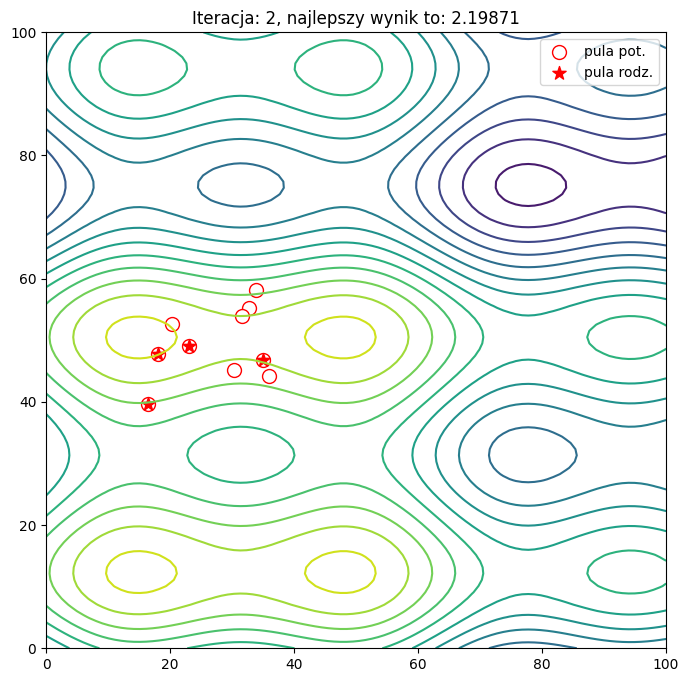

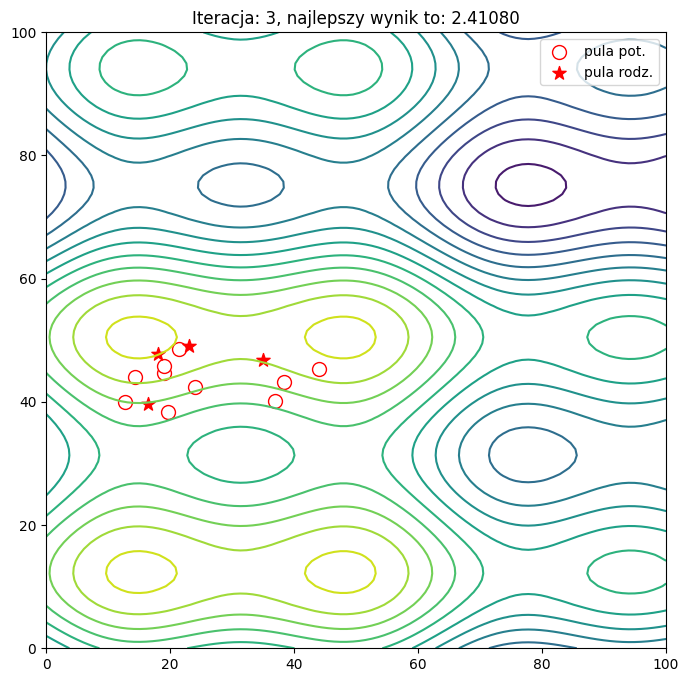

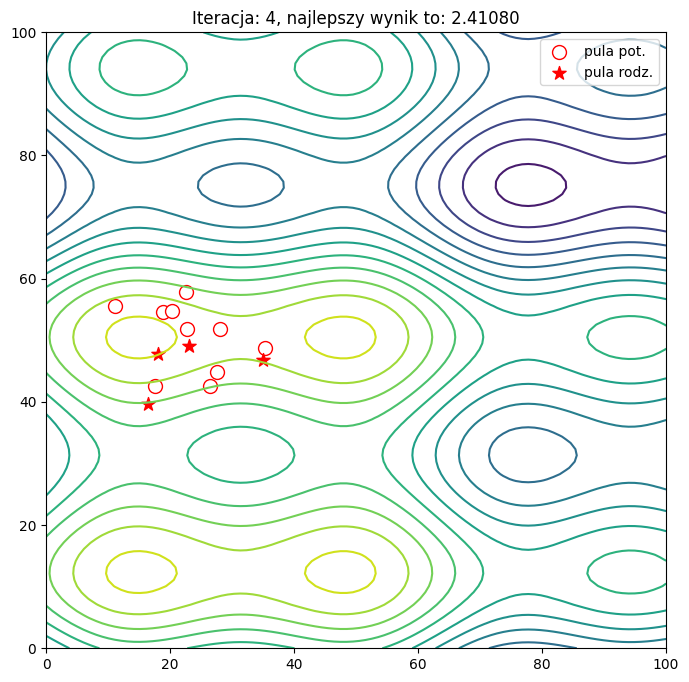

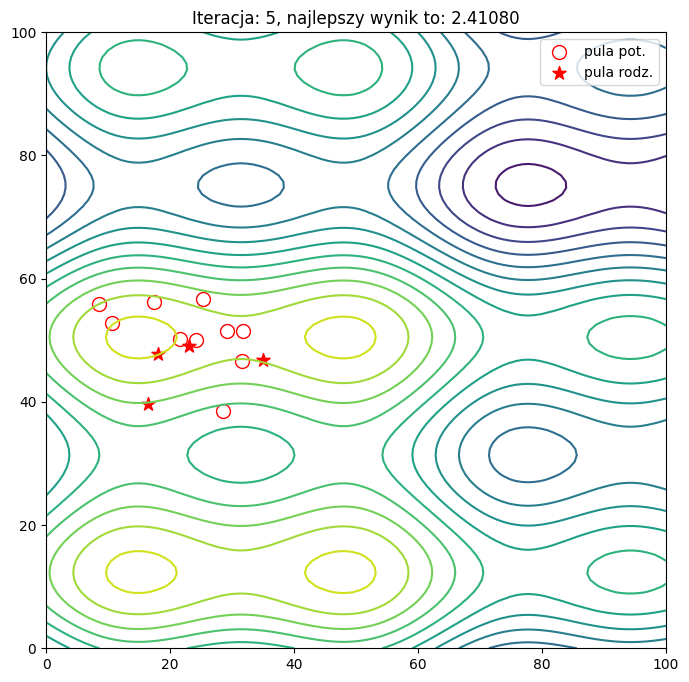

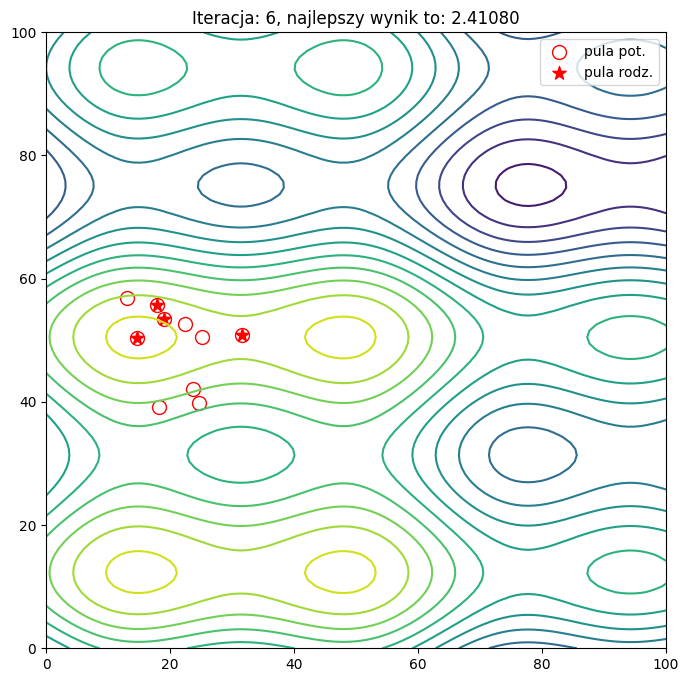

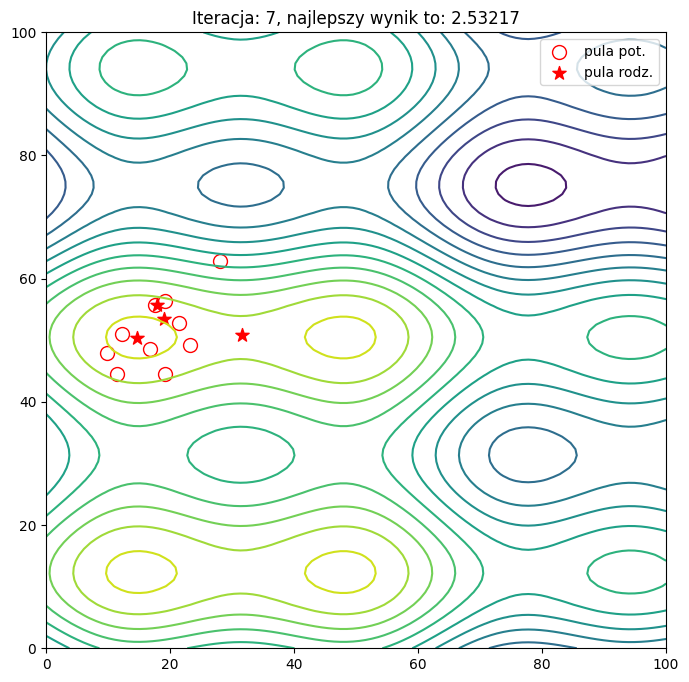

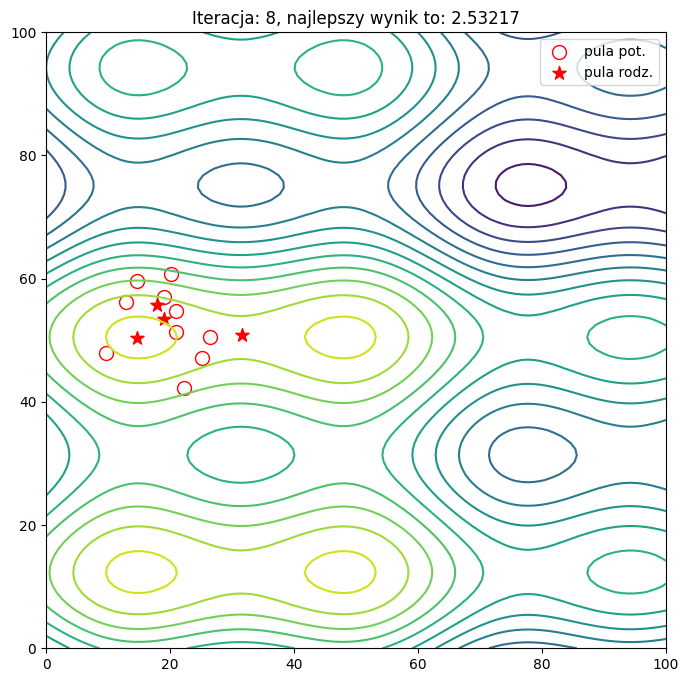

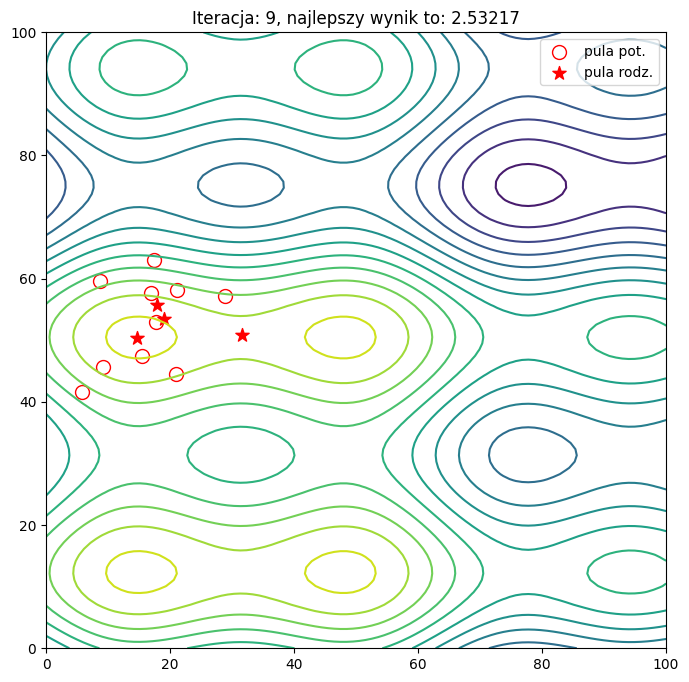

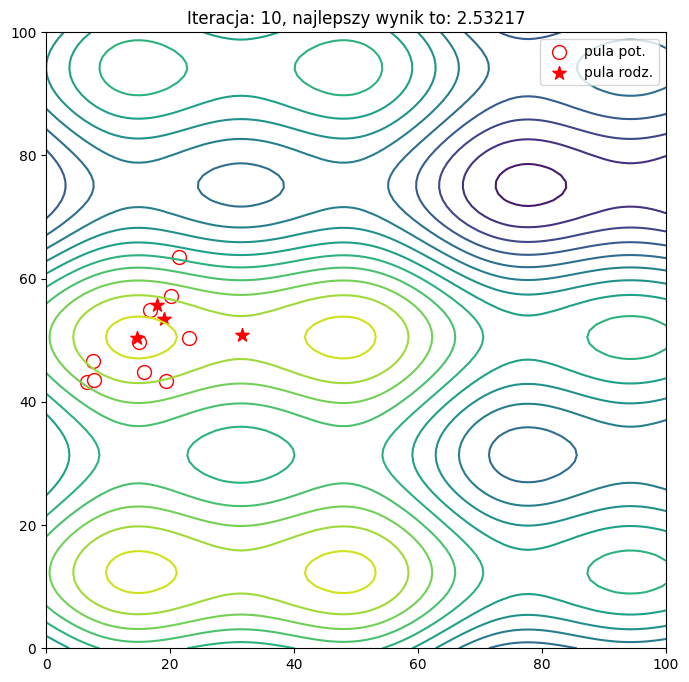

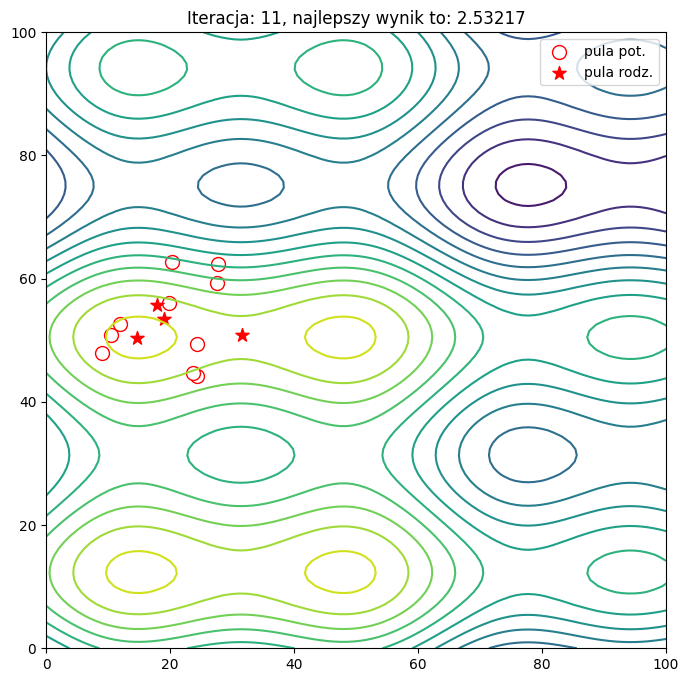

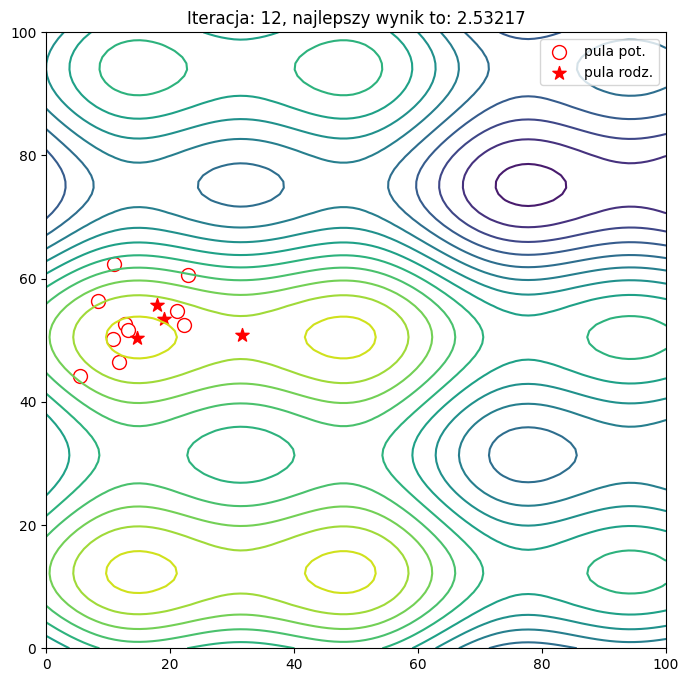

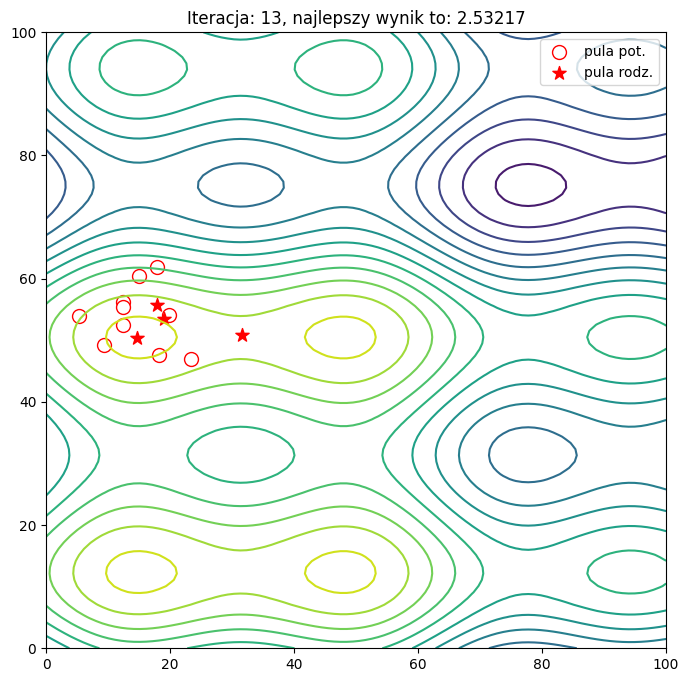

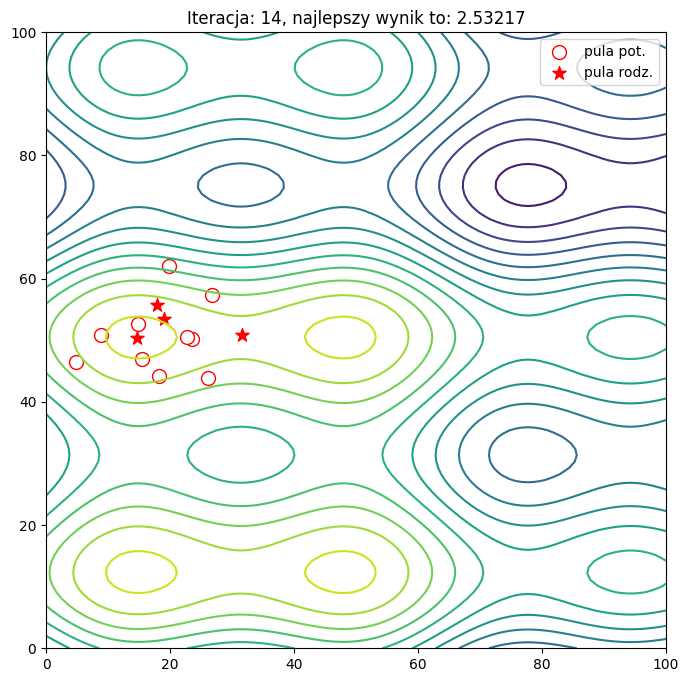

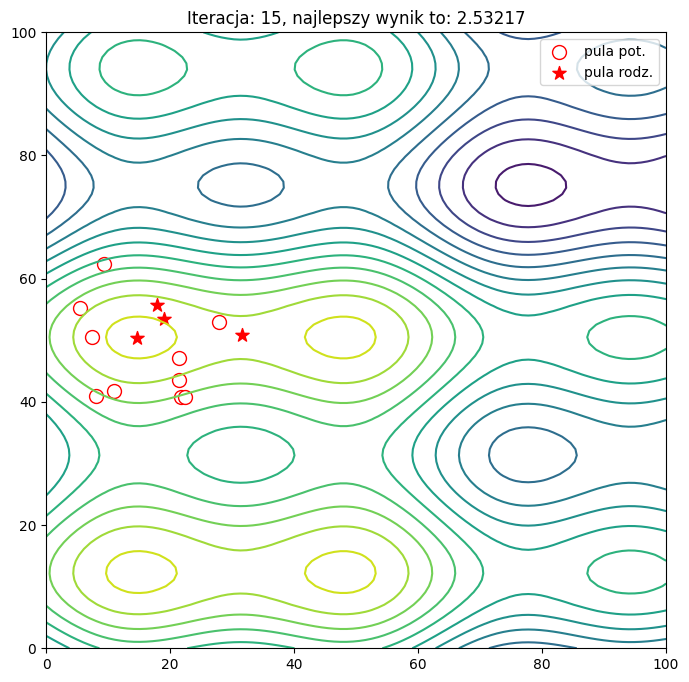

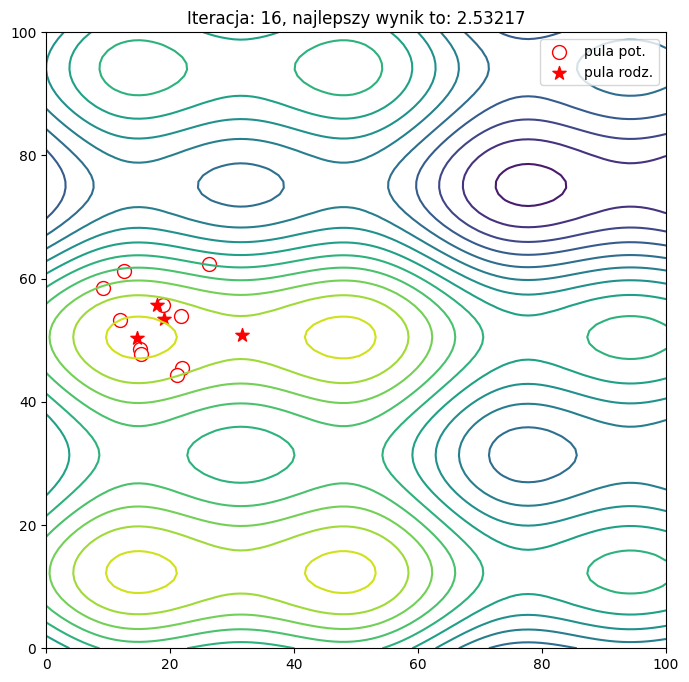

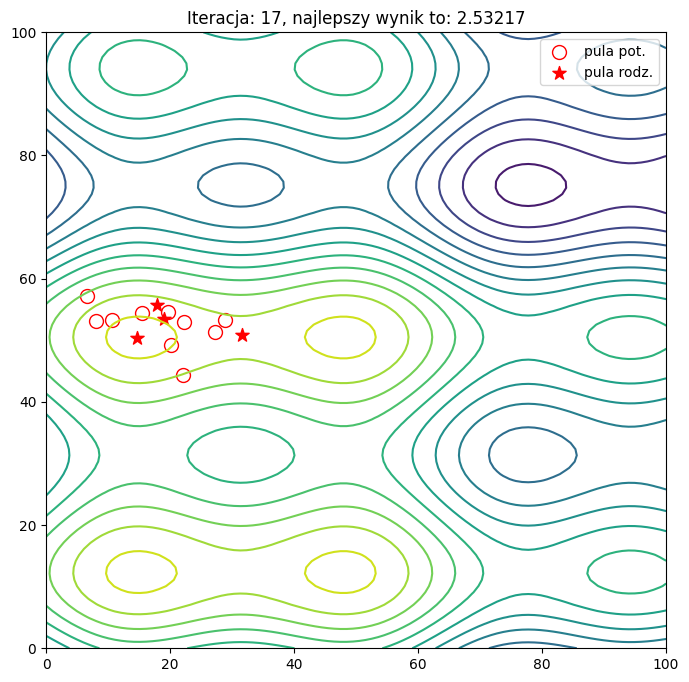

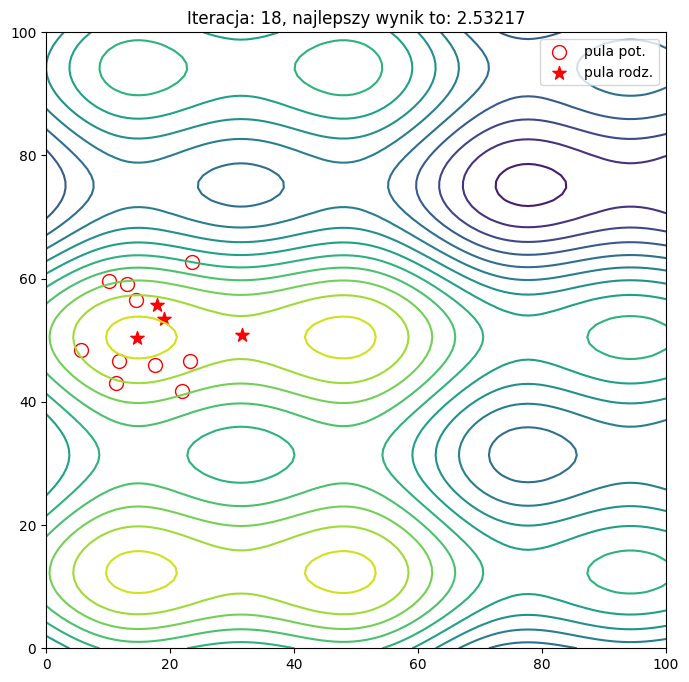

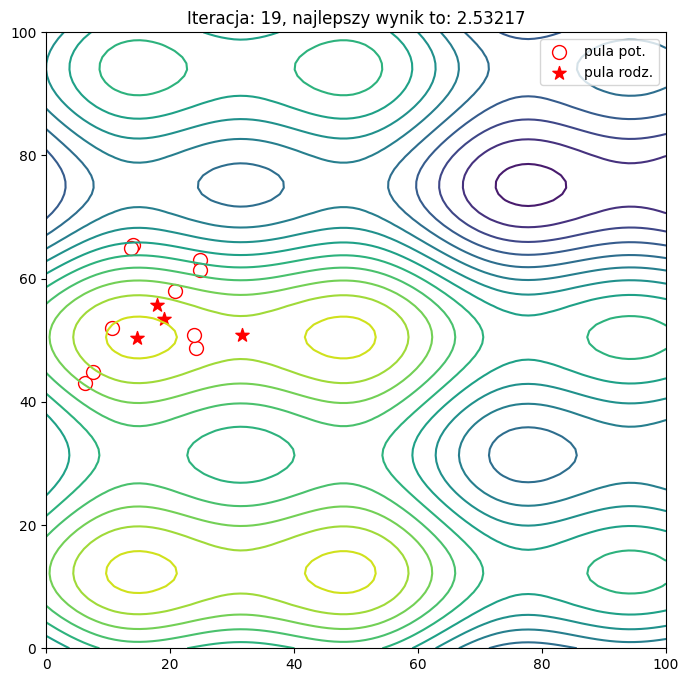

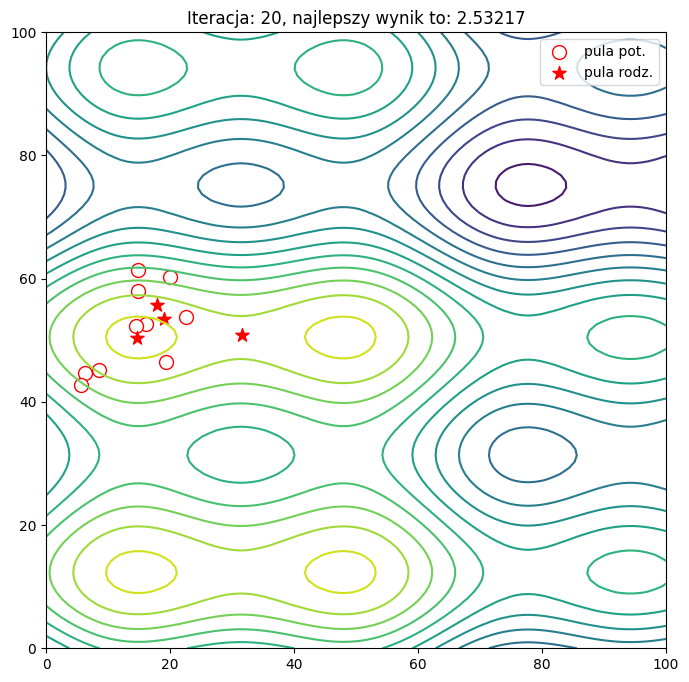

Najlepszy osobnik: [14.7196340448968, 50.37210934813412]
Największa wartość funkcji: 2.5321740445982277


In [200]:
parents = [[random.uniform(0, 100), random.uniform(0, 100)] for _ in range(mu)]  # 1. Stwórz w sposób losowy pulę rodzicielską składającą się z µ osobników.

for i in range(ITERACJE_LICZBA):  # 2. Wykonaj pętlę iteracje_liczba razy.
    parents_ratings = [funkcja_przystosowania(parent[0], parent[1]) for parent in parents]  # 2.1. Oceń każdy osobnik z puli rodzicielskiej za pomocą funkcji przystosowania.
    best_rating = max(parents_ratings)
    children = []  # 2.2. Stwórz pustą pulę osobników potomnych.
    for _ in range(lambda_):  # 2.3. Dodaj do puli potomnej λ nowych osobników.
        os_n = algorytm_turniejowy(parents, parents_ratings)  # 2.3.1. Wybierz osobnika os_n z puli rodzicielskiej za pomocą algorytmu turniejowego.
        os_n = [  # 2.3.2. Dokonaj mutacji na os_n poprzez dodanie do x1,x2 tego osobnika drobnej wartości z przedziału [-mutacja_poziom; +mutacja_poziom]
            min(100, max(0, os_n[0] + random.uniform(-MUTACJA_POZIOM, MUTACJA_POZIOM))),
            min(100, max(0, os_n[1] + random.uniform(-MUTACJA_POZIOM, MUTACJA_POZIOM)))
        ]
        children.append(os_n)
    children_ratings = [funkcja_przystosowania(child[0], child[1]) for child in children]  # 2.4. Oceń wszystkich osobników w puli potomnej.
    
    parents_with_children = parents + children
    ratings = parents_ratings + children_ratings
    parents = []  # 2.5. Niech nową pulą rodzicielską będzie µ najlepszych osobników wybranych z połączonego zbioru osobników rodzicielskich i potomnych (stąd nazwa „strategia µ+λ”)
    for _ in range(mu):
        best_parent = parents_with_children[np.argmax([ratings[idx] for idx, val in enumerate(parents_with_children)])]
        parents.append(parents_with_children.pop(parents_with_children.index(best_parent)))
        
    plt.figure(figsize=(8, 8))
    plt.contour(X, Y, Z, levels=15)
    plt.scatter([c[0] for c in children], [c[1] for c in children], color='white', edgecolor='red', marker='o', s=100, label='pula pot.')
    plt.scatter([p[0] for p in parents], [p[1] for p in parents], color='red', marker='*', s=100, label='pula rodz.')
    plt.title(f'Iteracja: {i+1}, najlepszy wynik to: {best_rating:.5f}')
    plt.legend()
    plt.show()  # Wykres wychodzi inny niż w przykładzie: https://academo.org/demos/3d-surface-plotter/?expression=sin(x*0.05)%2Bsin(y*0.05)%2B0.4*sin(x*0.15)%2Bsin(y*0.15)&xRange=0%2C%20100&yRange=0%2C%20100&resolution=25

final_ratings = [funkcja_przystosowania(parent[0], parent[1]) for parent in parents]
final_best_parent = parents[np.argmax(final_ratings)]  # 3. Wybierz najlepszego osobnika z puli rodzicielskiej jako ostateczne rozwiązanie.
final_best_rating = max(final_ratings)

print('Najlepszy osobnik:', final_best_parent)
print('Największa wartość funkcji:', final_best_rating)